# KNN, NB, LR, SVM, DT, RF, XGBOOST Modeling - Bank Marketing Dataset

In [1]:
# importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures


In [2]:
#Reading Preprocessed data. First column is deleted because its index and redundant
df=pd.read_csv("/content/PreprocessedBank.csv").drop(['Unnamed: 0'],axis=1)

In [3]:
#dispaly first 5 rows
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,30,1,1787,1,1,19,79,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
1,33,1,4789,0,0,11,220,1,339,4,...,0,0,0,1,0,0,0,1,0,0
2,35,1,1350,0,1,16,185,1,330,1,...,0,0,0,0,0,0,0,1,0,0
3,30,1,1476,0,0,3,199,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
4,59,1,0,0,1,5,226,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [4]:
#Standardisation of Data
scaler=StandardScaler()
scaler.fit(df.drop('deposit',axis=1))
scaled_features=scaler.transform(df.drop('deposit',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jan,jul,jun,mar,may,nov,oct,sep,failure,success
0,-1.056270,0.130759,0.121072,1.142051,0.424756,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,...,-0.430185,-0.364805,-0.104676,-0.669064,-0.306828,7.450671,-0.107869,-0.348652,-0.171381,0.469300
1,-0.772583,0.130759,1.118644,-0.875617,-2.354292,-0.596026,-0.169194,-0.576829,2.989044,2.041734,...,-0.430185,-0.364805,-0.104676,1.494626,-0.306828,-0.134216,-0.107869,2.868193,-0.171381,-2.130831
2,-0.583458,0.130759,-0.024144,-0.875617,0.424756,0.010273,-0.303898,-0.576829,2.899143,0.270124,...,-0.430185,-0.364805,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869,2.868193,-0.171381,-2.130831
3,-1.056270,0.130759,0.017726,-0.875617,-2.354292,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,...,-0.430185,2.741190,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869,-0.348652,-0.171381,0.469300
4,1.686036,0.130759,-0.472753,-0.875617,0.424756,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,...,-0.430185,-0.364805,-0.104676,1.494626,-0.306828,-0.134216,-0.107869,-0.348652,-0.171381,0.469300


**Notes :**
1. Algorithms like KNN, Naive bayes, Logistic Regression and SVM require Standardised Data
2. Tree based Algorithms are scale independant
3. standardisation basically subtracts mean and divides std deviation of column from each value

# Train Test Split

In [5]:
# 30% Data is set aside for tesing
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['deposit'],test_size=0.20, random_state=3)

# Applying KNN

In [6]:
# trying different odd values of k for KNN and finding accuracy for them

knn = KNeighborsClassifier(n_neighbors=1)
accuracy_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

[0.860618906964999, 0.8824658330910147, 0.8849543165852987, 0.8855052723404906, 0.8882699989286971, 0.8879952862674279, 0.8871665569856599, 0.8879945210511012, 0.8871627309040265, 0.885229029246568, 0.8849527861526454, 0.8857830458670666, 0.885506802773144, 0.8852282640302412, 0.8852267335975881, 0.8868857225937774, 0.8874389739979491, 0.8885454768062931, 0.8877175127408519, 0.8860577585283359]


Text(0, 0.5, 'Accuracy rate')

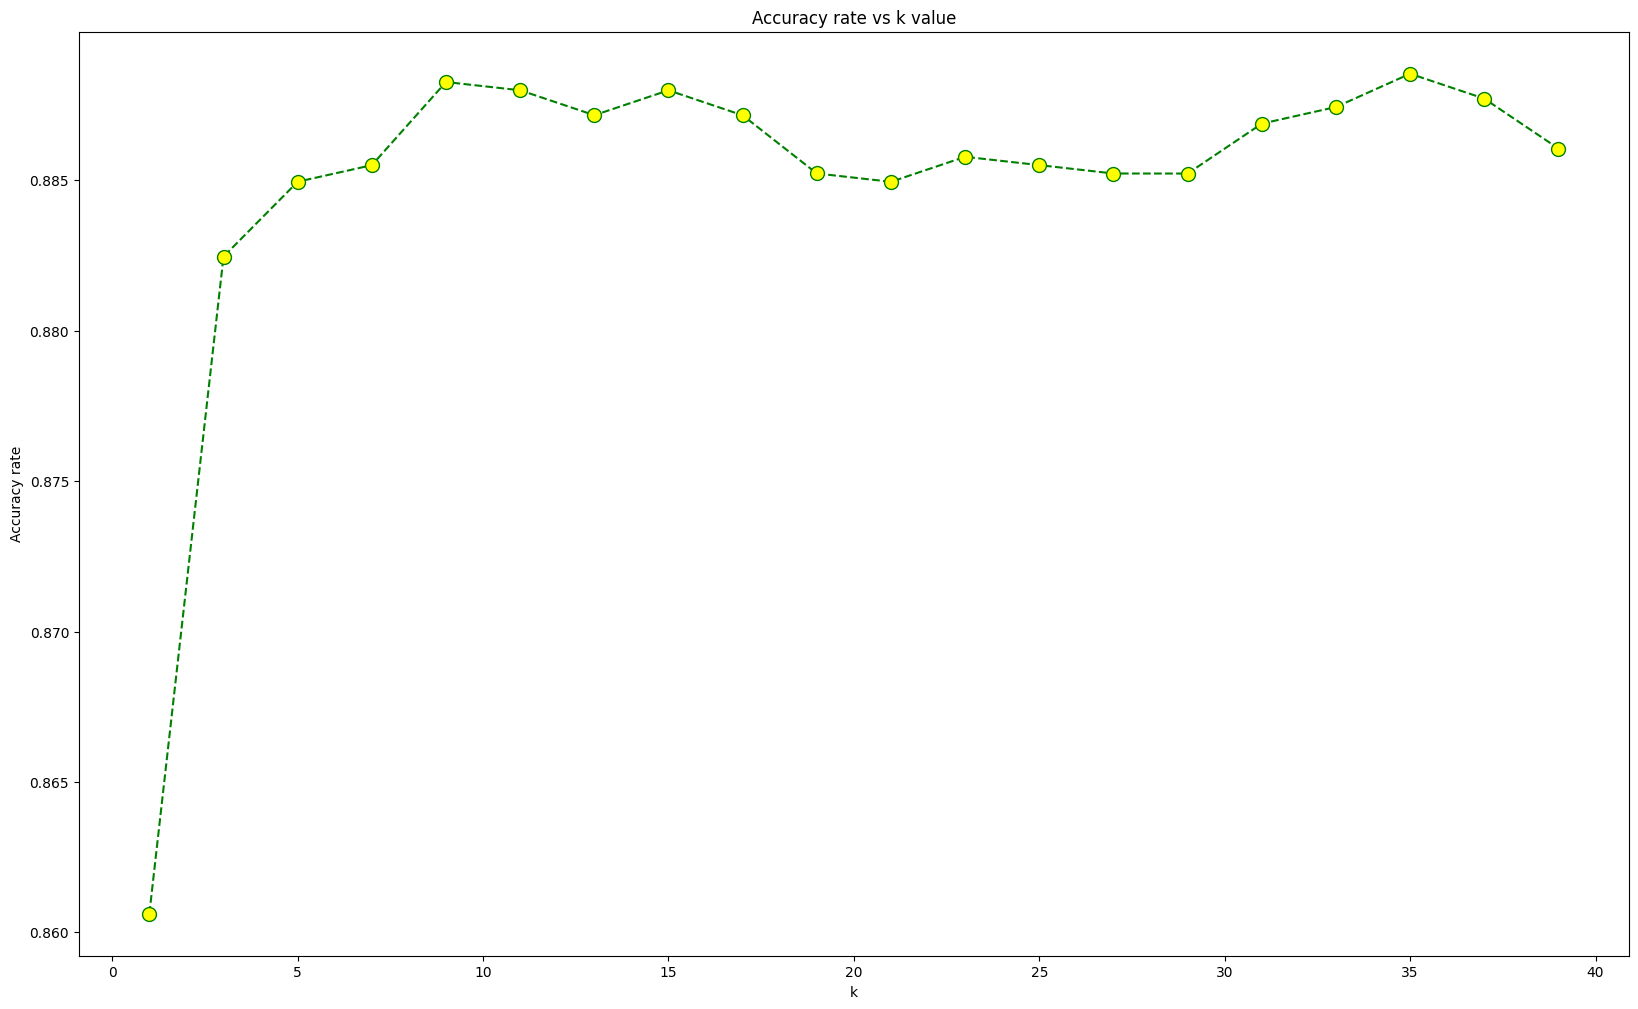

In [7]:
# plotting accuracy of KNN for every value of K. Accuracy is highest when K=9

plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),accuracy_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [8]:
!nvidia-smi


Mon Nov 11 16:57:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
pip install --extra-index-url https://pypi.nvidia.com cuml-cu12

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.7/567.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 836.6/836.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.9/196.9 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.7/722.7 kB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.0/916.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[I] [17:00:24.662097] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:00:26.445323] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:00:26.453070] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:00:26.459559] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:00:26.466254] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:00:26.472316] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:00:26.478534] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:00:26.484915] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:00:26.490922] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:00:26.496985] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:00:26.505040] Unused keyword parameter: n_jobs during cuML estimator ini

Text(0, 0.5, 'F1 score')

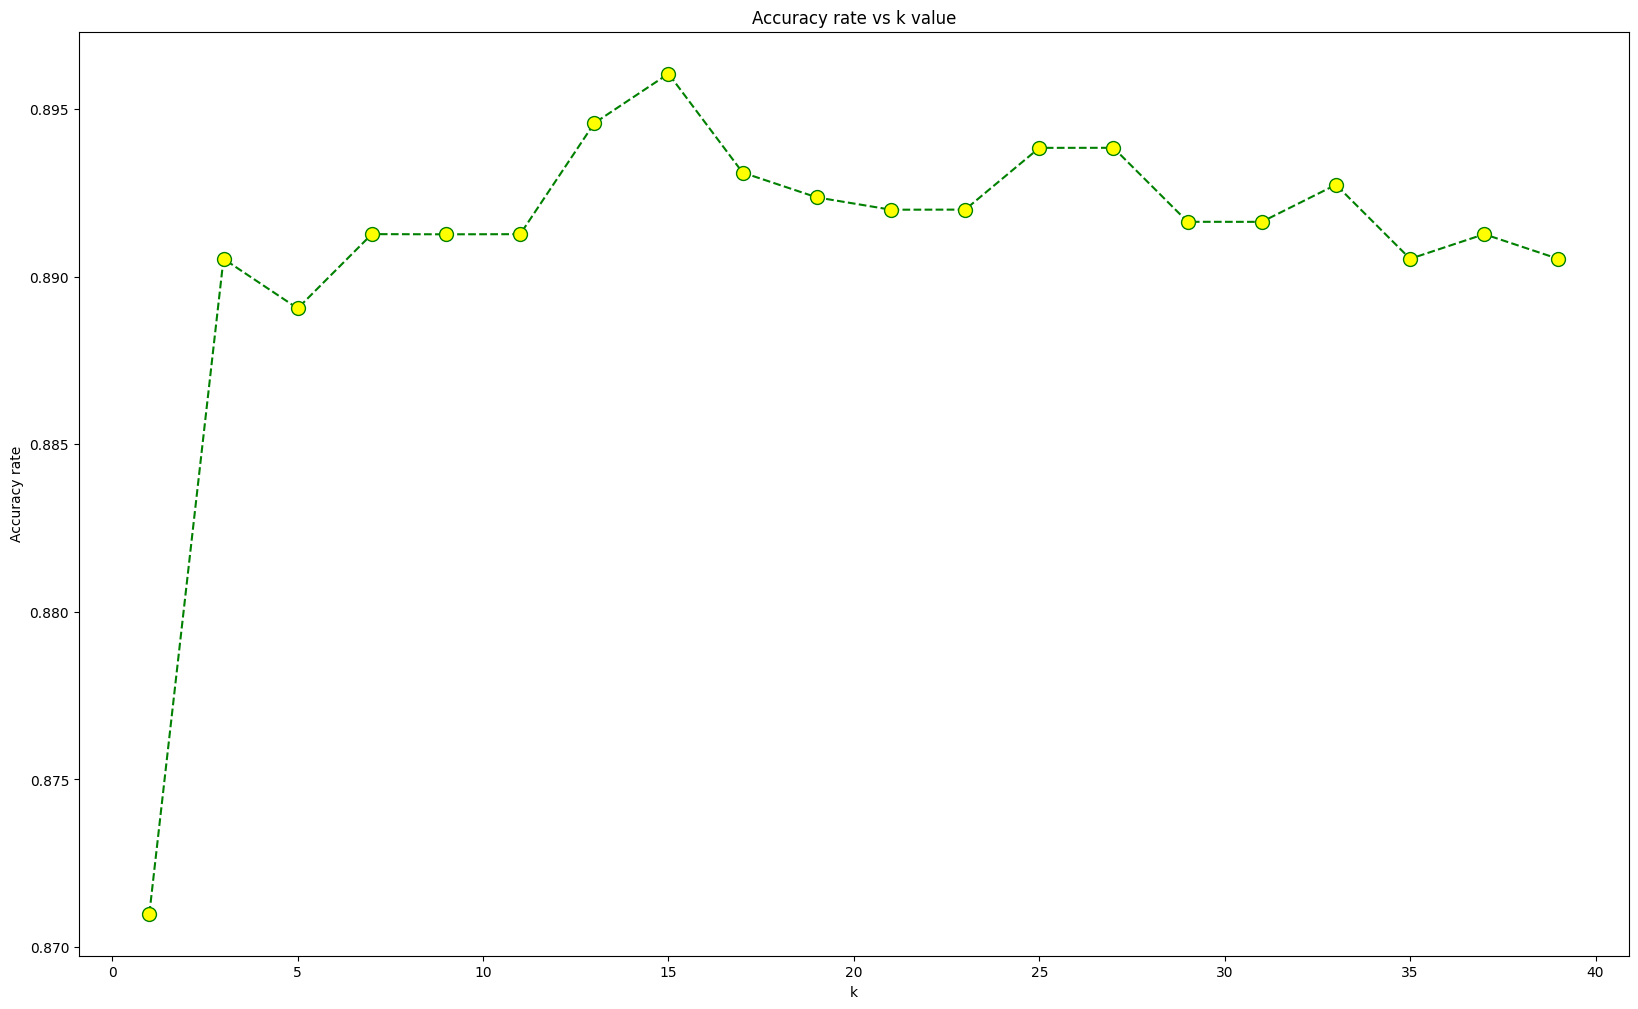

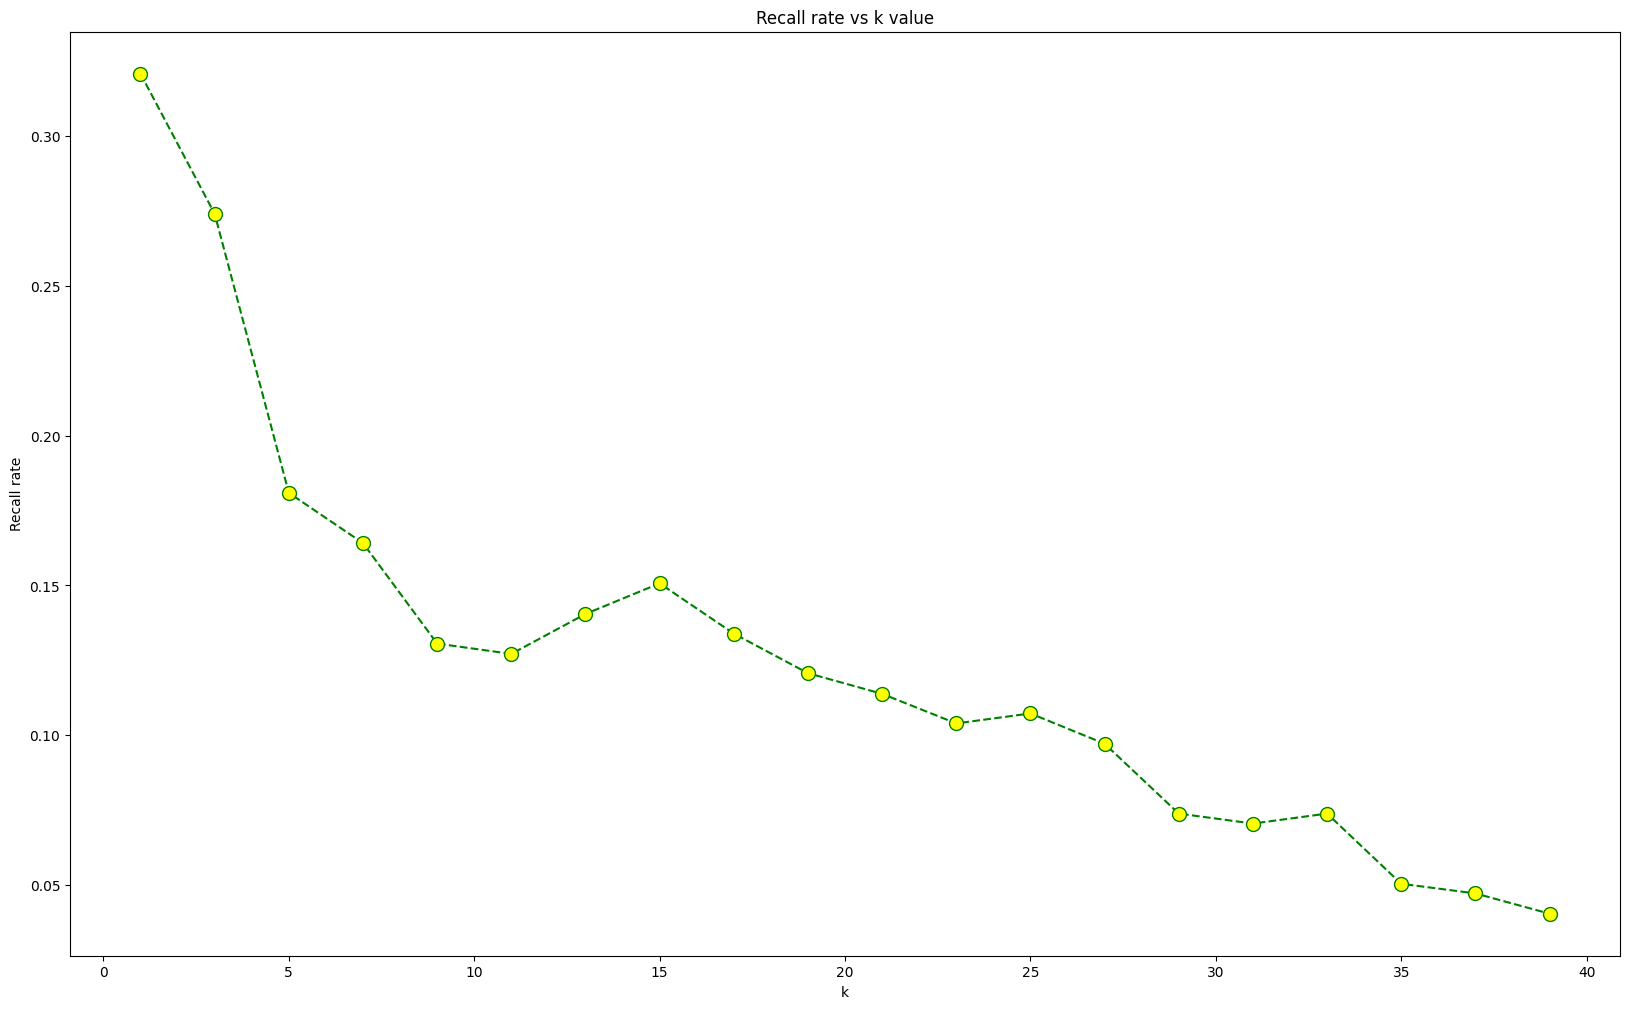

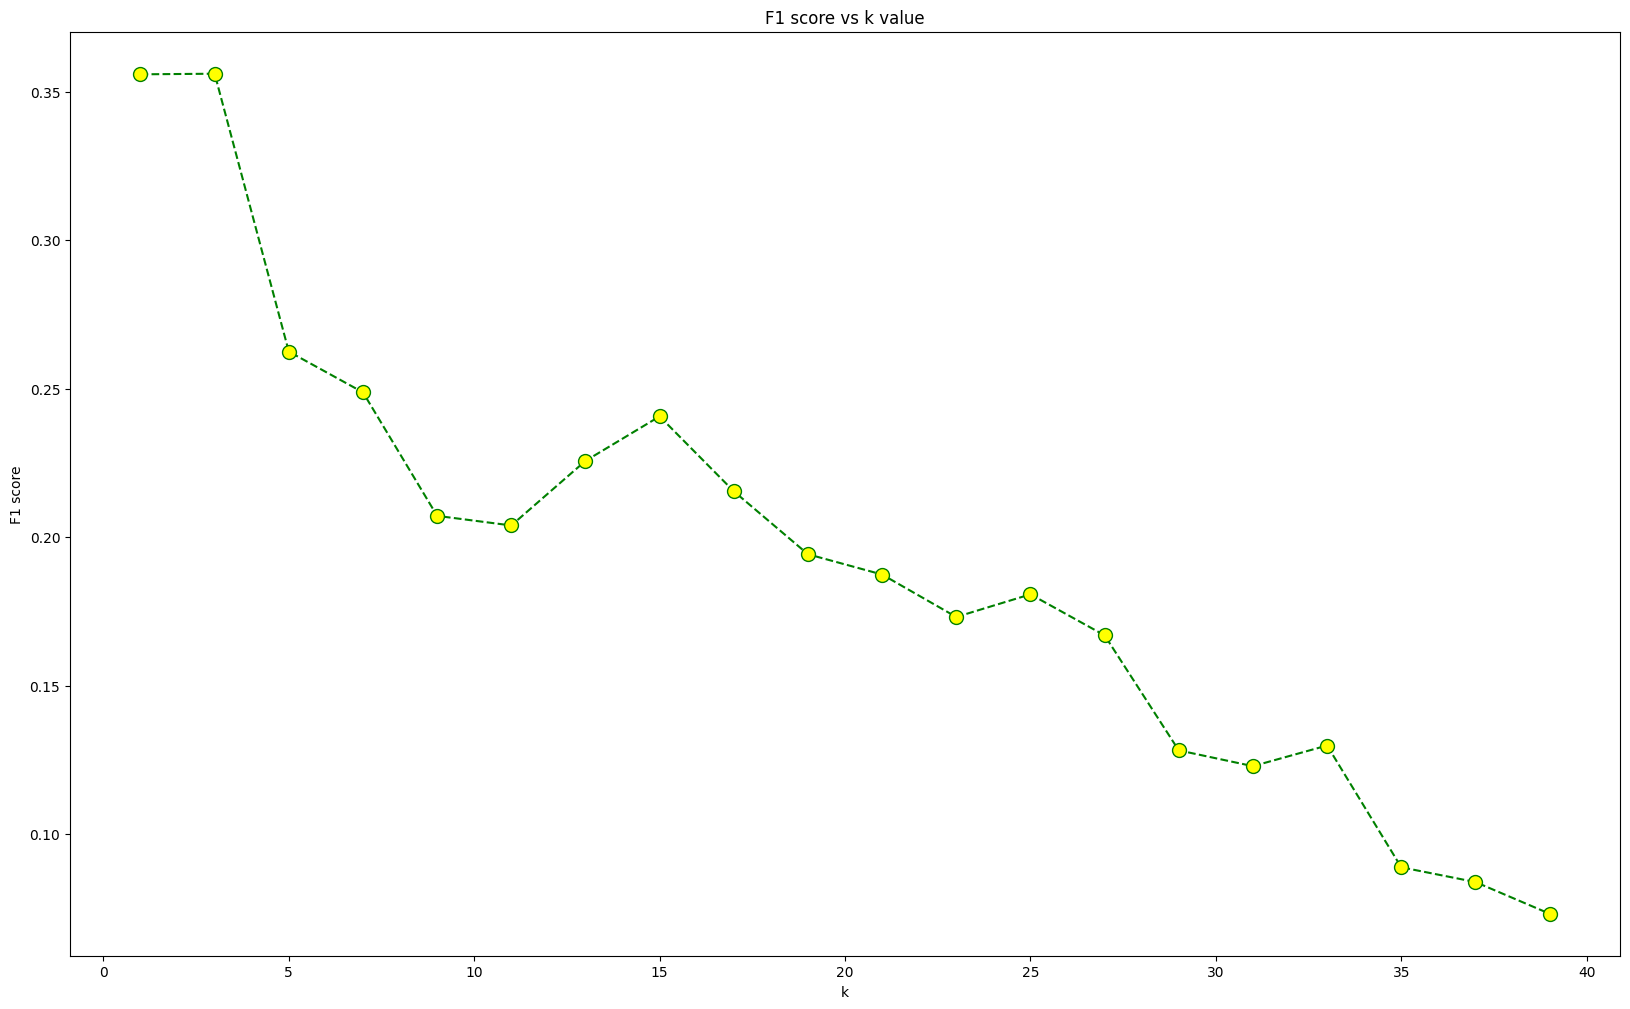

In [10]:

# Step 1: Install cuML and other dependencies in Colab


# Step 2: Import necessary libraries
import cuml
import cupy as cp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from cuml.neighbors import KNeighborsClassifier as cuKNN
from cuml.metrics import accuracy_score, roc_auc_score
from cuml.model_selection import train_test_split
#from cuml.model_selection import cross_val_score
from cuml.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from cuml.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Step 3: Read the dataset
df = pd.read_csv("/content/PreprocessedBank.csv").drop(['Unnamed: 0'], axis=1)

# Step 4: Preprocess the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('deposit', axis=1).values)
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

# Step 5: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['deposit'].values, test_size=0.40, random_state=3)

# Step 6: KNN with cuML and cross-validation for accuracy
accuracy_rate = []
for i in range(1, 40, 2):
    knn = cuKNN(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train, cv=10)
    accuracy_rate.append(score.mean())

print(accuracy_rate)

plt.figure(figsize=(20, 12))
plt.plot(range(1, 40, 2), accuracy_rate, color='green', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

# Step 7: KNN model with selected k value (e.g., k=9) and metrics evaluation
knn = cuKNN(n_neighbors=9)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)
aucScoreKNN = roc_auc_score(y_test, y_pred_prob[:, 1])
fprKNN, tprKNN, thresholds = roc_curve(y_test, y_pred_prob[:, 1])

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("AUC score for KNN is", aucScoreKNN)
print("Test Accuracy score for KNN is", accuracy_score(y_test, pred))
predT = knn.predict(X_train)
print("Train Accuracy score for KNN is", accuracy_score(y_train, predT))

# Step 8: KNN with recall score cross-validation
recall_rate = []
for i in range(1, 40, 2):
    knn = cuKNN(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='recall')
    recall_rate.append(score.mean())

print(recall_rate)

plt.figure(figsize=(20, 12))
plt.plot(range(1, 40, 2), recall_rate, color='green', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Recall rate vs k value')
plt.xlabel('k')
plt.ylabel('Recall rate')

# Step 9: KNN with f1-score cross-validation
f1_scores = []
for i in range(1, 40, 2):
    knn = cuKNN(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')
    f1_scores.append(score.mean())

print(f1_scores)

plt.figure(figsize=(20, 12))
plt.plot(range(1, 40, 2), f1_scores, color='green', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('F1 score vs k value')
plt.xlabel('k')
plt.ylabel('F1 score')


In [ ]:
pip install --extra-index-url https://pypi.nvidia.com cuml-cu12

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.7/567.7 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 836.6/836.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.9/196.9 MB 6.2 MB/s eta 0:00:00
  Using cached treelite-4.3.0-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.7/722.7 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.0/916.0 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[0.8554590840026048, 0.8783237464727589, 0.8779533861515085, 0.8794294009116562, 0.8805336987193402, 0.8845886694161059, 0.886432331235077, 0.8849563164749293, 0.8845845995224657, 0.8827409377034947, 0.8831085847623182, 0.8831072281311048, 0.8849508899500759, 0.8842169524636423, 0.8853226069025396, 0.8853212502713262, 0.8842183090948555, 0.8827436509659214, 0.8823746472758845, 0.884219665726069]
[[1582   21]
 [ 178   28]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1603
           1       0.57      0.14      0.22       206

    accuracy                           0.89      1809
   macro avg       0.74      0.56      0.58      1809
weighted avg       0.86      0.89      0.86      1809

AUC score for KNN is  0.7776590010235663
Test Accuracy score for KNN is  0.8899944720840243
Train Accuracy score for KNN is  0.8923303834808259
[0.2665322580645161, 0.1966733870967742, 0.13356854838709678, 0.12691532258064514, 0.12379032258064515,

Text(0, 0.5, 'Accuracy rate')

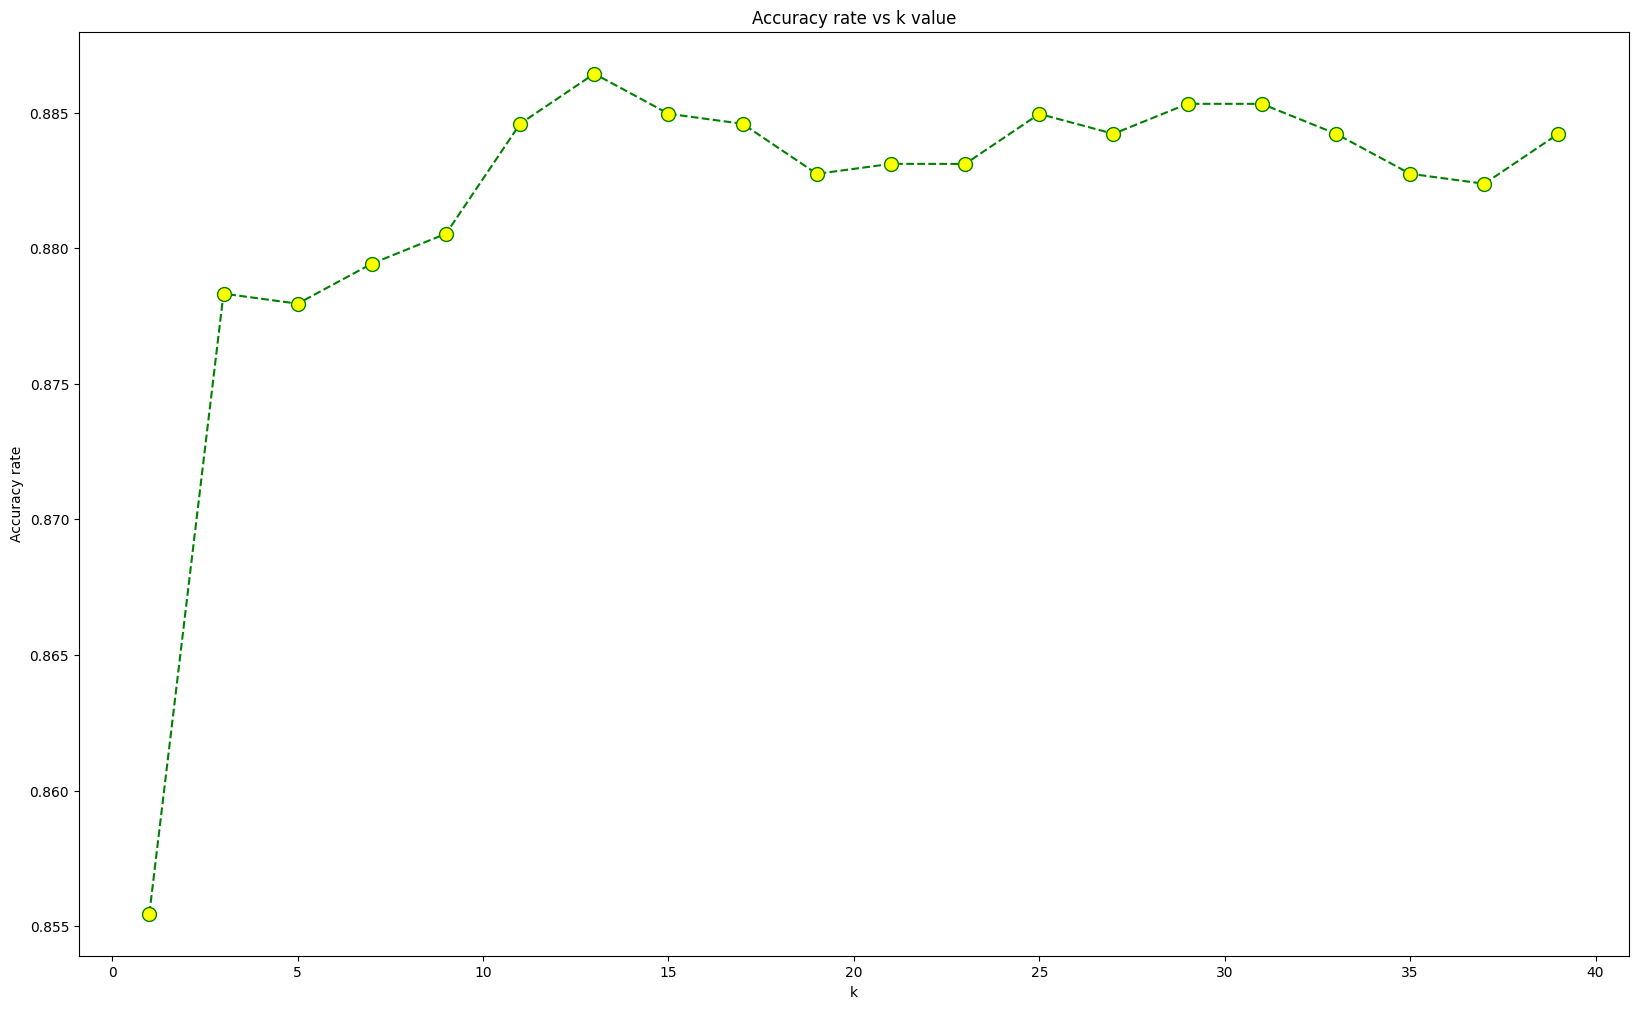

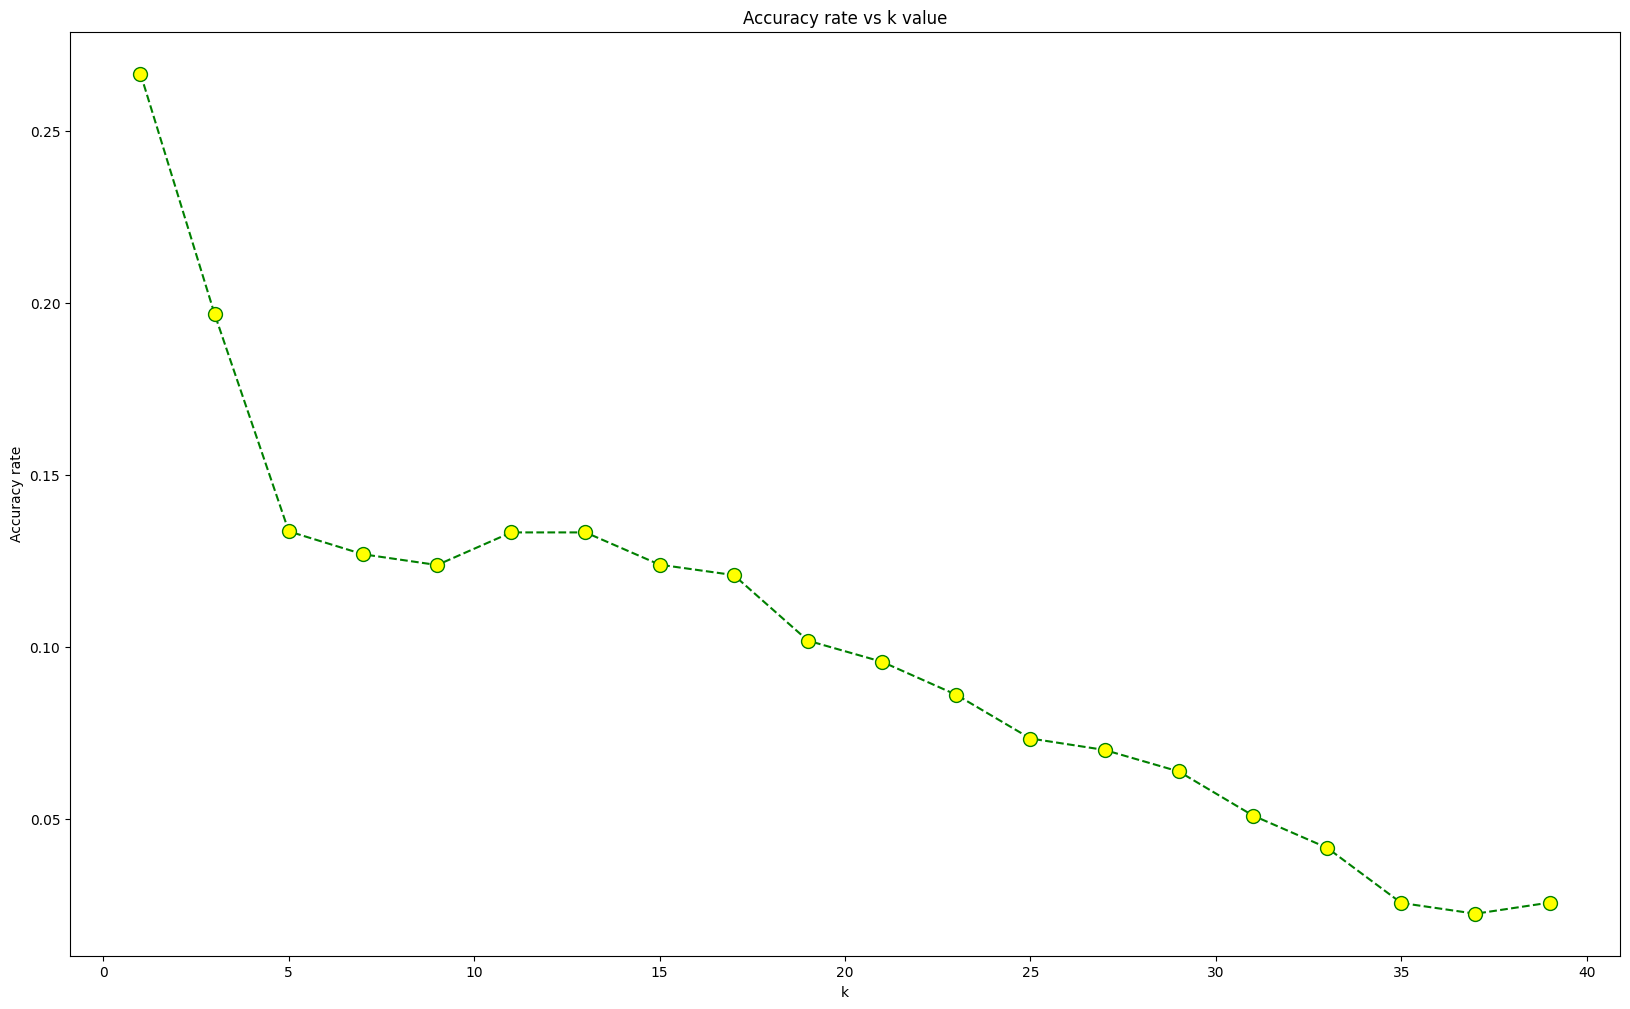

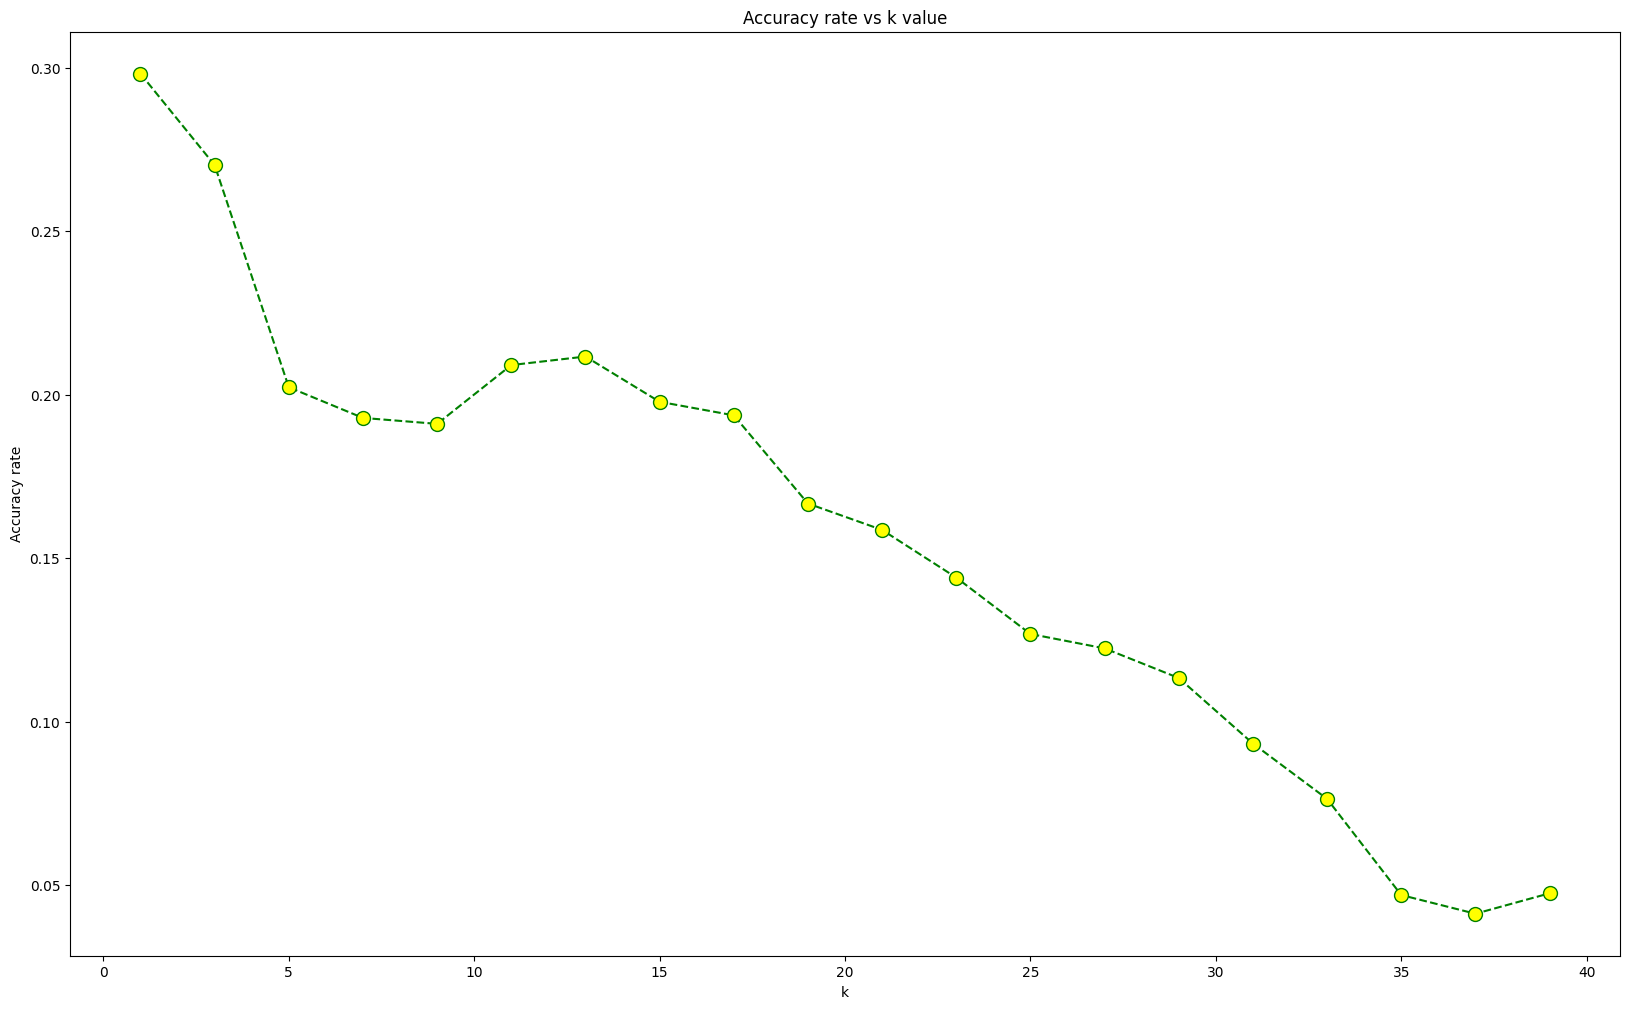

In [11]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures


df=pd.read_csv("/content/PreprocessedBank.csv").drop(['Unnamed: 0'],axis=1)

df.head()

scaler=StandardScaler()
scaler.fit(df.drop('deposit',axis=1))
scaled_features=scaler.transform(df.drop('deposit',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['deposit'],test_size=0.40, random_state=3)





knn = KNeighborsClassifier(n_neighbors=1)
accuracy_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)



plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),accuracy_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')


knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)
aucScoreKNN = roc_auc_score(y_test,  y_pred_prob[:,1])
fprKNN, tprKNN, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for KNN is ",aucScoreKNN)
print("Test Accuracy score for KNN is ",accuracy_score(y_test, pred))
predT=knn.predict(X_train)
print("Train Accuracy score for KNN is ",accuracy_score(y_train, predT))

knn = KNeighborsClassifier()
recall_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10,scoring='recall')
    recall_rate.append(score.mean())
print(recall_rate)



plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),recall_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

f1_scores = []
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10,scoring='f1')
    f1_scores.append(score.mean())
print(f1_scores)



plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),f1_scores,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')


In [12]:
    # TRaining KNN agaib for best value of K
    # Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    y_pred_prob = knn.predict_proba(X_test)
    aucScoreKNN = roc_auc_score(y_test,  y_pred_prob[:,1])
    fprKNN, tprKNN, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("AUC score for KNN is ",aucScoreKNN)
    print("Test Accuracy score for KNN is ",accuracy_score(y_test, pred))
    predT=knn.predict(X_train)
    print("Train Accuracy score for KNN is ",accuracy_score(y_train, predT))
    #print("Best parameters for KNN are ",knn.best_params_)


[[1582   21]
 [ 178   28]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1603
           1       0.57      0.14      0.22       206

    accuracy                           0.89      1809
   macro avg       0.74      0.56      0.58      1809
weighted avg       0.86      0.89      0.86      1809

AUC score for KNN is  0.7776590010235663
Test Accuracy score for KNN is  0.8899944720840243
Train Accuracy score for KNN is  0.8923303834808259


In [13]:
# Training KNN for different odd values of K to find maximum Recall

knn = KNeighborsClassifier()
recall_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10,scoring='recall')
    recall_rate.append(score.mean())
print(recall_rate)

[0.2665322580645161, 0.1966733870967742, 0.13356854838709678, 0.12691532258064514, 0.12379032258064515, 0.13326612903225804, 0.13326612903225804, 0.12389112903225805, 0.12086693548387098, 0.10181451612903225, 0.09566532258064515, 0.08608870967741936, 0.07338709677419356, 0.07006048387096775, 0.06381048387096774, 0.05100806451612903, 0.04163306451612903, 0.02560483870967742, 0.02247983870967742, 0.025705645161290324]


#KEEP CODING

Text(0, 0.5, 'Accuracy rate')

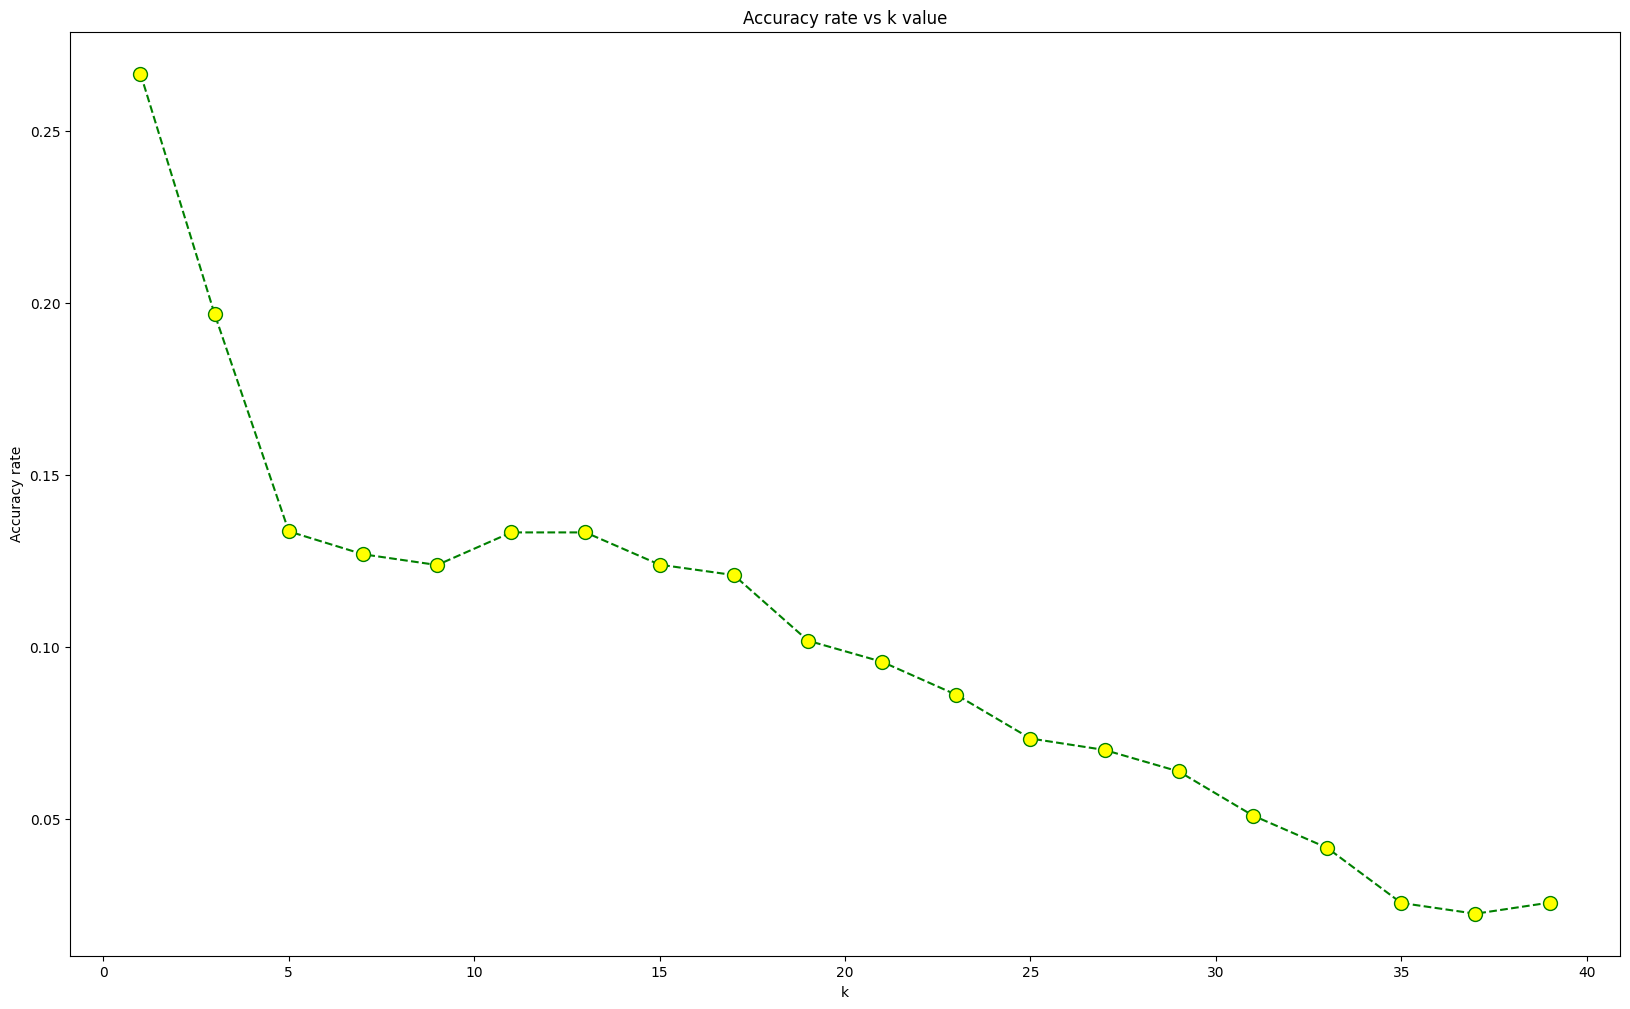

In [14]:
# plotting recall of values of K

plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),recall_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [15]:
f1_scores = []
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10,scoring='f1')
    f1_scores.append(score.mean())
print(f1_scores)

[0.2982402947679576, 0.27027116085782404, 0.20230524624045265, 0.19292683993247703, 0.19111093430733994, 0.2090995195276176, 0.21170892068838154, 0.1978612602213223, 0.19371375782606637, 0.166728228037599, 0.15865638522891412, 0.14407143011764317, 0.12681539650579898, 0.1224150496905915, 0.11334840570134688, 0.09329768270944742, 0.07636278753925814, 0.04694264069264069, 0.04122835497835498, 0.04747835497835498]


Text(0, 0.5, 'Accuracy rate')

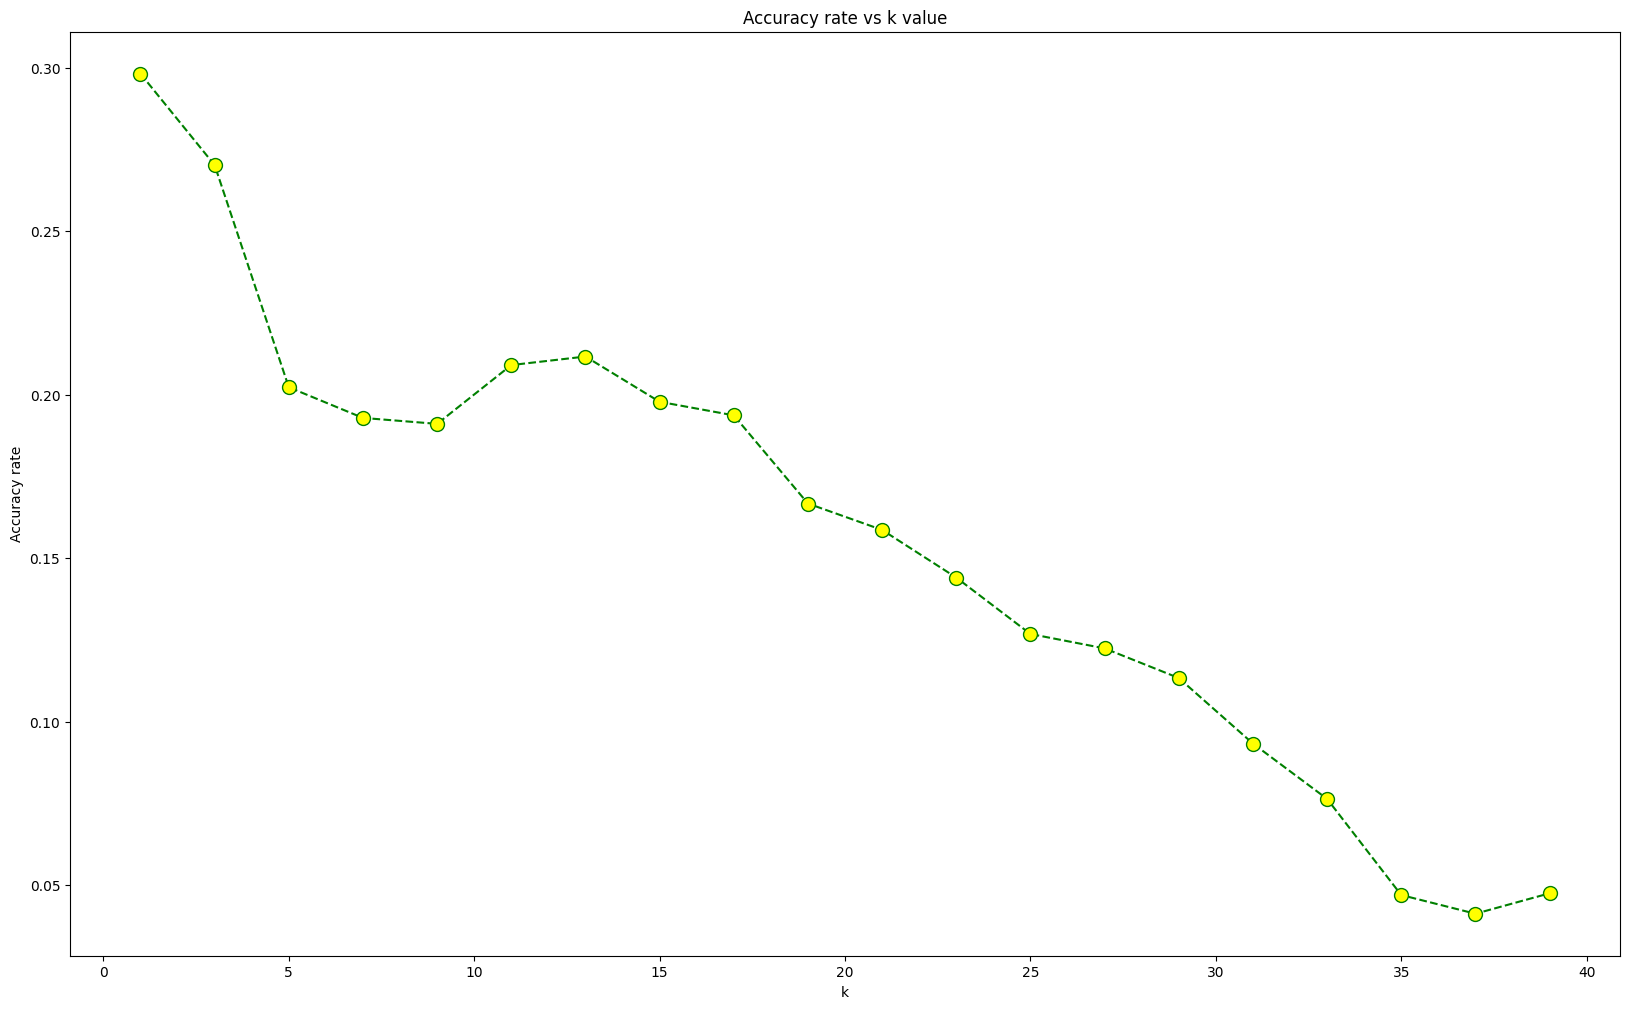

In [16]:
# plotting f1 score of values of K

plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),f1_scores,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

**Notes:**
1. KNN gives accuracy of 0.74 which is not very good
2. There is not much difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.68 whihc is not very good

# Applying Logistics Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Predict on the test data
y_pre_log = lr.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pre_log)
f1 = f1_score(y_test, y_pre_log)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.9065782200110558
F1 Score: 0.46006389776357826


**Notes:**
1. Naive Bayes gives accuracy of 0.70 which is not very good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.53 which is very poor

# Applying Logistic Regression

**Notes:**
1. Hyperparameters for Logistic Regression
2. Penalty indicates which regularization to use
3. C decides how much weightage is given to Regularization
4. Solver is the technique used internally
5. max_iter is the number of iterations for convergence

**Notes:**

1.  Logistic Regression gives accuracy of 0.81 which is fairly good
2.  There is very less difference between train and test accuracy so its not overfitting or underfitting
3.  Recall is 0.79 which is not very good


In [18]:
classifier = SVC(probability=True)
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
            {'C':[1,10,100,1000],'kernel': ['poly'], 'degree':[2,3,4]}      ]


In [19]:
from sklearn.svm import SVC
support_vector_classifier=SVC(kernel='rbf')# we use that in bydeafault parameter
support_vector_classifier.fit(X_train,y_train)

SVC()

In [20]:
y_pred = support_vector_classifier.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [21]:
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8916528468767275
F1 Score: 0.3049645390070922


**Notes:**
1. Support vector machines gives accuracy of 0.82 which is quite good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.89 which is very good

# Applying Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize Decision Tree with chosen parameters (without GridSearchCV)
dtc = DecisionTreeClassifier(
    criterion='gini',       # Example: Use 'gini' criterion
    max_depth=10,           # Example: Set max_depth to 10
    min_samples_leaf=2,     # Example: Set min_samples_leaf to 2
    min_samples_split=3     # Example: Set min_samples_split to 3
)

# Train the model on the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pre_dis = dtc.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pre_dis)
f1 = f1_score(y_test, y_pre_dis)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.8839137645107794
F1 Score: 0.378698224852071


**Notes:**
1. Decision Tree gives accuracy of 0.81 which is quite good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.82 which is quite good

# Applying Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize Random Forest with chosen parameters (without GridSearchCV)
rfc = RandomForestClassifier(
    n_estimators=500,       # Example: Set number of trees to 500
    criterion='gini',       # Example: Use 'gini' criterion
    max_features='sqrt',    # Changed 'auto' to 'sqrt'
    min_samples_leaf=2,     # Example: Set min_samples_leaf to 2
    min_samples_split=5,    # Example: Set min_samples_split to 5
    bootstrap=True          # Example: Use bootstrap sampling
)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Predict on the test data
y_pre_rn = rfc.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pre_rn)
f1 = f1_score(y_test, y_pre_rn)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8993919292426755
F1 Score: 0.36363636363636365


**Notes:**
1. Random Forest gives accuracy of 0.84 which is quite good
2. There is quite difference between train and test accuracy but its not severe overfitting or underfitting
3. Recall is 0.88 which is very good

# Applying XGBoost

In [29]:
from xgboost import XGBClassifier

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize XGBoost with chosen parameters (without GridSearchCV)
XGB_Classifier = XGBClassifier(
    eta=0.2,                   # Example: Set eta (learning rate) to 0.2
    min_child_weight=2,        # Example: Set min_child_weight to 2
    gamma=5,                   # Example: Set gamma to 5
    subsample=0.8,             # Example: Set subsample to 0.8
    colsample_bytree=0.8       # Example: Set colsample_bytree to 0.8
)

# Train the model on the training data
XGB_Classifier.fit(X_train, y_train)

# Predict on the test data
y_pre_xgb = XGB_Classifier.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pre_xgb)
f1 = f1_score(y_test, y_pre_xgb)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.9027086788280818
F1 Score: 0.46987951807228917


Accuracy: 0.8822553897180763
F1 Score: 0.3564954682779456
Precision: 0.472
Recall: 0.28640776699029125
ROC AUC: 0.6576837119720913


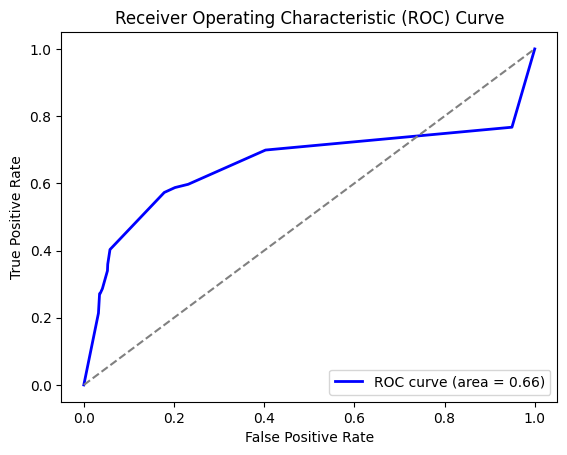

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize Decision Tree with chosen parameters (without GridSearchCV)
dtc = DecisionTreeClassifier(
    criterion='gini',       # Use 'gini' criterion
    max_depth=10,           # Set max_depth to 10
    min_samples_leaf=2,     # Set min_samples_leaf to 2
    min_samples_split=3     # Set min_samples_split to 3
)

# Train the model on the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pre_dis = dtc.predict(X_test)
y_proba = dtc.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pre_dis)
f1 = f1_score(y_test, y_pre_dis)
precision = precision_score(y_test, y_pre_dis)
recall = recall_score(y_test, y_pre_dis)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9027086788280818
F1 Score: 0.46987951807228917
Precision: 0.6190476190476191
Recall: 0.3786407766990291
ROC AUC: 0.8932114542514338


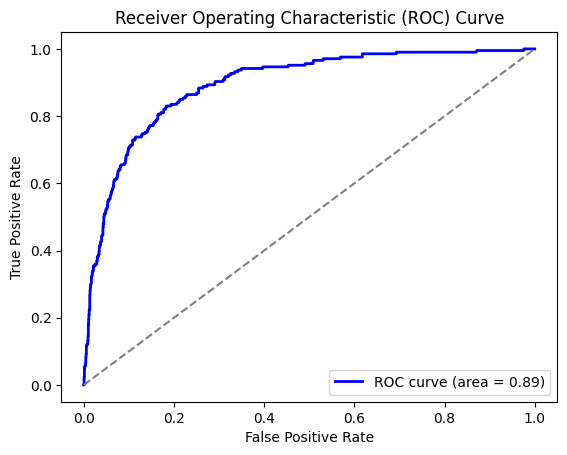

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize XGBoost with chosen parameters (without GridSearchCV)
XGB_Classifier = XGBClassifier(
    eta=0.2,                   # Set eta (learning rate) to 0.2
    min_child_weight=2,        # Set min_child_weight to 2
    gamma=5,                   # Set gamma to 5
    subsample=0.8,             # Set subsample to 0.8
    colsample_bytree=0.8       # Set colsample_bytree to 0.8
)

# Train the model on the training data
XGB_Classifier.fit(X_train, y_train)

# Predict on the test data
y_pre_xgb = XGB_Classifier.predict(X_test)
y_proba_xgb = XGB_Classifier.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pre_xgb)
f1 = f1_score(y_test, y_pre_xgb)
precision = precision_score(y_test, y_pre_xgb)
recall = recall_score(y_test, y_pre_xgb)
roc_auc = roc_auc_score(y_test, y_proba_xgb)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.8982863460475401
F1 Score: 0.3475177304964539
Precision: 0.6447368421052632
Recall: 0.23786407766990292
ROC AUC: 0.9042178197433212


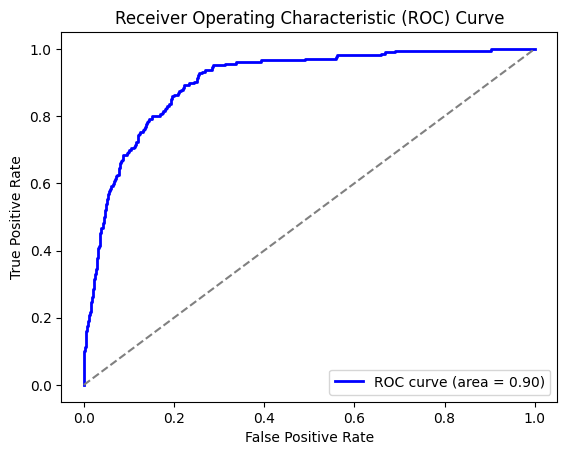

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize Random Forest with chosen parameters (without GridSearchCV)
rfc = RandomForestClassifier(
    n_estimators=500,       # Set number of trees to 500
    criterion='gini',       # Use 'gini' criterion
    max_features='sqrt',    # Use 'sqrt' for max features
    min_samples_leaf=2,     # Set min_samples_leaf to 2
    min_samples_split=5,    # Set min_samples_split to 5
    bootstrap=True          # Use bootstrap sampling
)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Predict on the test data
y_pre_rn = rfc.predict(X_test)
y_proba_rn = rfc.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pre_rn)
f1 = f1_score(y_test, y_pre_rn)
precision = precision_score(y_test, y_pre_rn)
recall = recall_score(y_test, y_pre_rn)
roc_auc = roc_auc_score(y_test, y_proba_rn)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rn)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.8800442233278054
F1 Score: 0.3483483483483483
Precision: 0.4566929133858268
Recall: 0.2815533980582524
ROC AUC: 0.6493664791137976


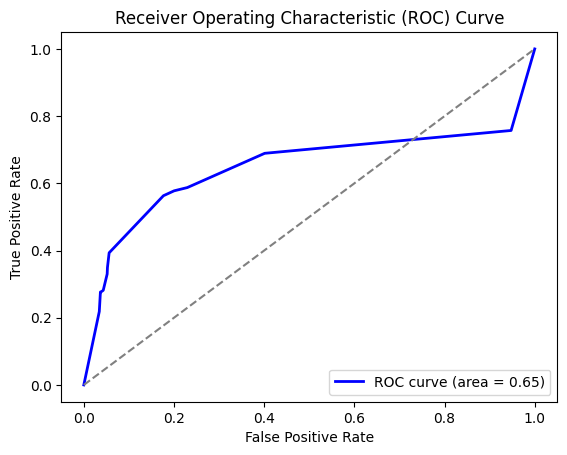

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize Decision Tree with chosen parameters (without GridSearchCV)
dtc = DecisionTreeClassifier(
    criterion='gini',       # Use 'gini' criterion
    max_depth=10,           # Set max_depth to 10
    min_samples_leaf=2,     # Set min_samples_leaf to 2
    min_samples_split=3     # Set min_samples_split to 3
)

# Train the model on the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pre_dis = dtc.predict(X_test)
y_proba_dis = dtc.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pre_dis)
f1 = f1_score(y_test, y_pre_dis)
precision = precision_score(y_test, y_pre_dis)
recall = recall_score(y_test, y_pre_dis)
roc_auc = roc_auc_score(y_test, y_proba_dis)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dis)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.8916528468767275
F1 Score: 0.3049645390070922
Precision: 0.5657894736842105
Recall: 0.2087378640776699
ROC AUC: 0.86515725974962


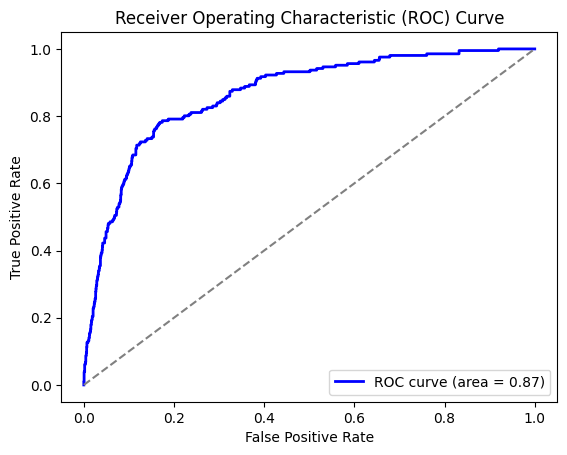

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize SVC with chosen parameters
support_vector_classifier = SVC(kernel='rbf', probability=True)  # Set probability=True for ROC AUC

# Train the model on the training data
support_vector_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = support_vector_classifier.predict(X_test)
y_proba = support_vector_classifier.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.8899944720840243
F1 Score: 0.2196078431372549
Precision: 0.5714285714285714
Recall: 0.13592233009708737
AUC Score: 0.7776590010235663
Confusion Matrix:
 [[1582   21]
 [ 178   28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1603
           1       0.57      0.14      0.22       206

    accuracy                           0.89      1809
   macro avg       0.74      0.56      0.58      1809
weighted avg       0.86      0.89      0.86      1809



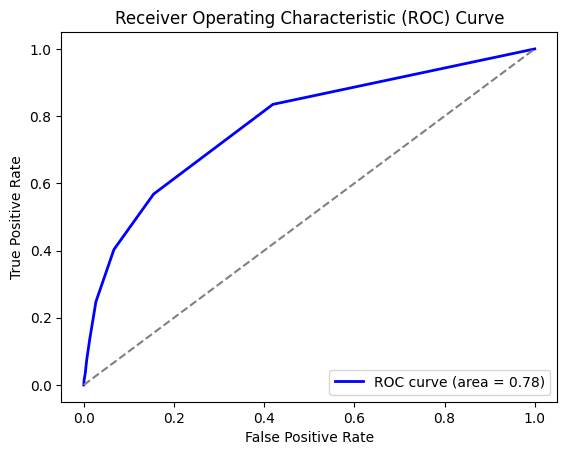

Train Accuracy: 0.8923303834808259


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Initialize KNN with the best K value
knn = KNeighborsClassifier(n_neighbors=9)

# Train the model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
auc_score_knn = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC Score: {auc_score_knn}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, pred))

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_score_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate train accuracy
pred_train = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, pred_train)
print(f"Train Accuracy: {train_accuracy}")


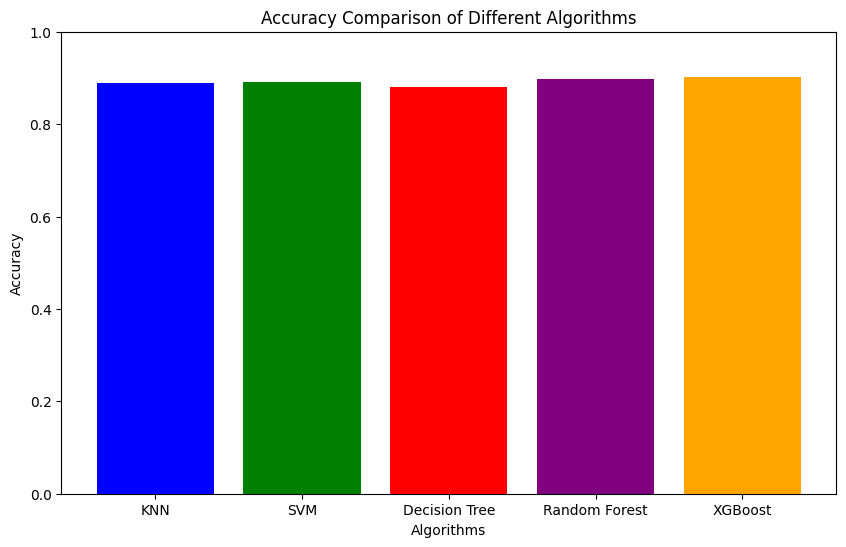

In [37]:
import matplotlib.pyplot as plt

# Accuracy scores for each algorithm based on your variable names
accuracy_scores = {
    'KNN': accuracy_score(y_test, pred),
    'SVM': accuracy_score(y_test, y_pred),
    'Decision Tree': accuracy_score(y_test, y_pre_dis),
    'Random Forest': accuracy_score(y_test, y_pre_rn),
    'XGBoost': accuracy_score(y_test, y_pre_xgb)
}

# Plotting the accuracies
algorithms = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Algorithms')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.show()


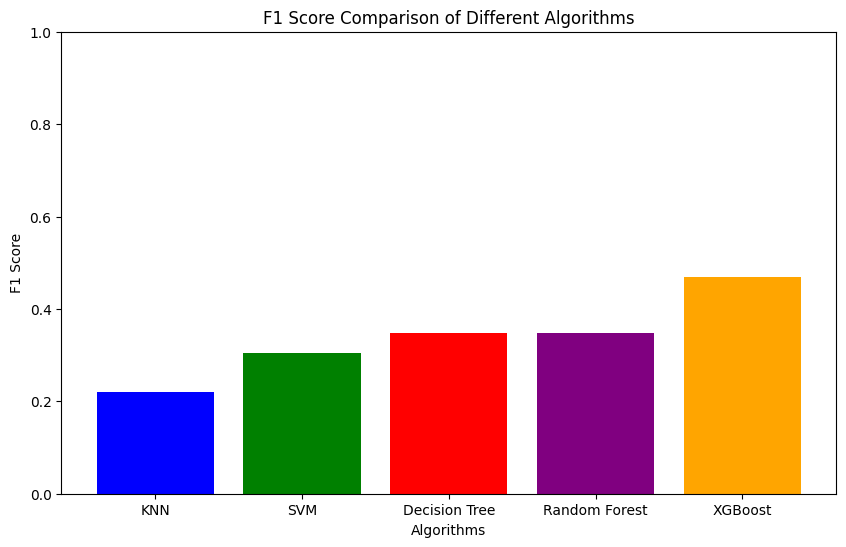

In [38]:
import matplotlib.pyplot as plt

# F1 scores for each algorithm based on your variable names
f1_scores = {
    'KNN': f1_score(y_test, pred),
    'SVM': f1_score(y_test, y_pred),
    'Decision Tree': f1_score(y_test, y_pre_dis),
    'Random Forest': f1_score(y_test, y_pre_rn),
    'XGBoost': f1_score(y_test, y_pre_xgb)
}

# Plotting the F1 scores
algorithms = list(f1_scores.keys())
f1_values = list(f1_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(algorithms, f1_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Different Algorithms')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization (assuming F1 score is between 0 and 1)
plt.show()


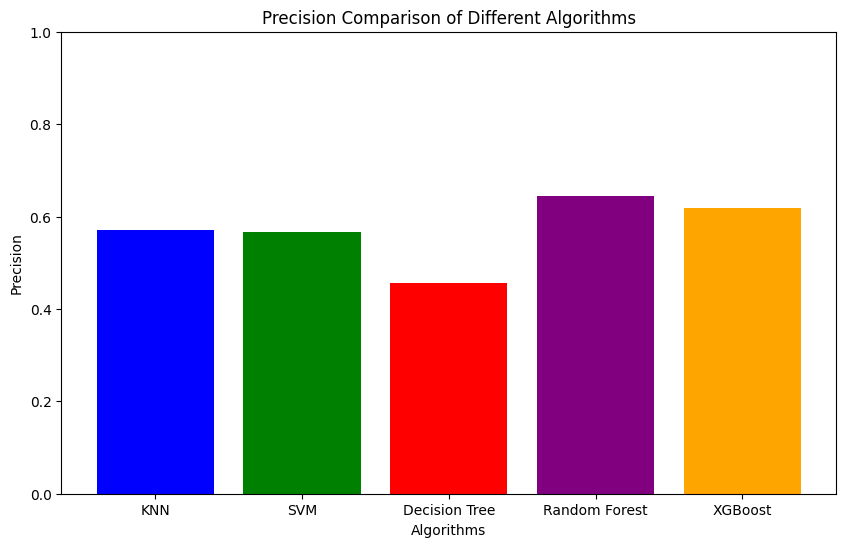

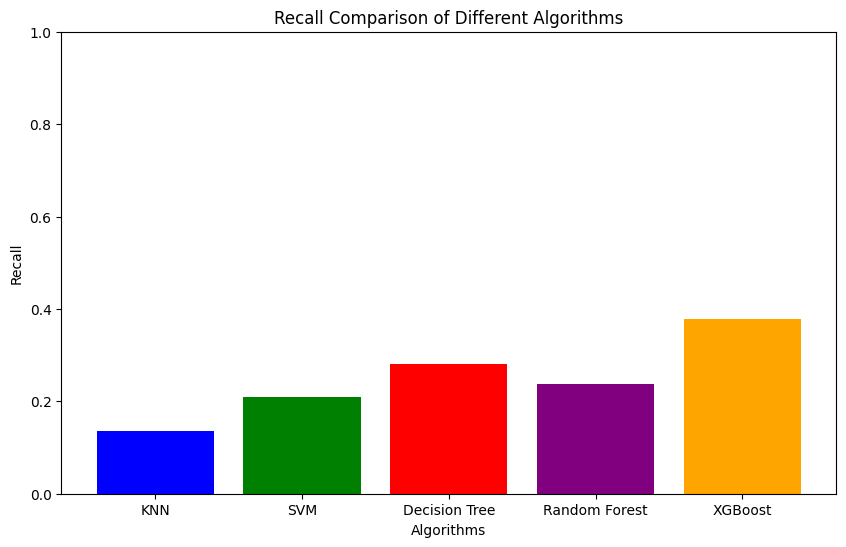

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Precision scores for each algorithm
precision_scores = {
    'KNN': precision_score(y_test, pred),
    'SVM': precision_score(y_test, y_pred),
    'Decision Tree': precision_score(y_test, y_pre_dis),
    'Random Forest': precision_score(y_test, y_pre_rn),
    'XGBoost': precision_score(y_test, y_pre_xgb)
}

# Recall scores for each algorithm
recall_scores = {
    'KNN': recall_score(y_test, pred),
    'SVM': recall_score(y_test, y_pred),
    'Decision Tree': recall_score(y_test, y_pre_dis),
    'Random Forest': recall_score(y_test, y_pre_rn),
    'XGBoost': recall_score(y_test, y_pre_xgb)
}

# Plotting Precision scores
plt.figure(figsize=(10, 6))
plt.bar(precision_scores.keys(), precision_scores.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.title('Precision Comparison of Different Algorithms')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.show()

# Plotting Recall scores
plt.figure(figsize=(10, 6))
plt.bar(recall_scores.keys(), recall_scores.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.title('Recall Comparison of Different Algorithms')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.show()


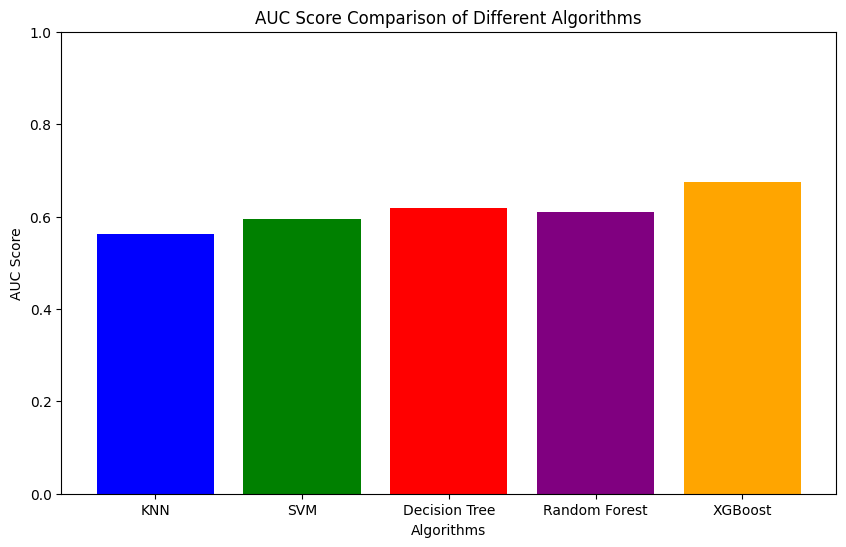

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# AUC scores for each algorithm based on your variable names
auc_scores = {
    'KNN': roc_auc_score(y_test, pred),  # Replace pred_prob with the predicted probabilities from your KNN model
    'SVM': roc_auc_score(y_test, y_pred),  # Replace y_pred_prob with the predicted probabilities from your SVM model
    'Decision Tree': roc_auc_score(y_test, y_pre_dis),  # Replace y_pre_dis_prob with decision tree probabilities
    'Random Forest': roc_auc_score(y_test, y_pre_rn),  # Replace y_pre_rn_prob with random forest probabilities
    'XGBoost': roc_auc_score(y_test, y_pre_xgb)  # Replace y_pre_xgb_prob with XGBoost probabilities
}

# Plotting the AUC scores
algorithms = list(auc_scores.keys())
auc_values = list(auc_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(algorithms, auc_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('AUC Score')
plt.title('AUC Score Comparison of Different Algorithms')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization (AUC is between 0 and 1)
plt.show()


**Notes:**
1. XGBOOST gives accuracy of 0.85 which is best amongst them
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.88 which is really Good
4. XGBBOST is basically an implementation of GBDT Gradint Boosting Decision Tree
5. XGBOOST have given us the best result so far

# Feature Importance using XGBOOST

**Notes:**
1. XGBOOST gives us best results so find important feaures for it
2. As per the feature importance of XGBOOST it is clear that bank need to focus more on clients with success in previous campaign. Whether client uses cellular phone or not and the month in which client is being called play a vital role


# ROC Curve

**NOTES:**
1. Random Forest and XGBOOST has best AUC
2. Many of them have gives more or less same value of AUC


#RESAMPLING

In [82]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install -U imbalanced-learn

Accuracy: 0.8971807628524047
F1 Score: 0.5326633165829145
Precision: 0.5520833333333334
Recall: 0.5145631067961165
ROC AUC: 0.9008715454639057


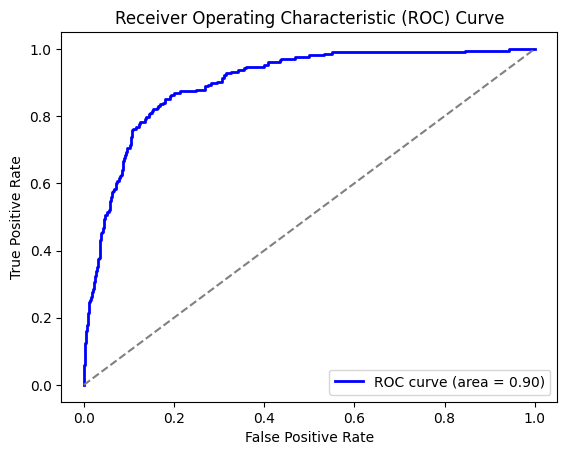

In [83]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already loaded in Colab
# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Step 1: Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train_encoded)

# Step 2: Define parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 1, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Step 3: Initialize XGBClassifier and RandomizedSearchCV
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=20,              # Number of parameter settings sampled
    scoring='f1',           # Optimize for F1-score
    cv=5,                   # 5-fold cross-validation
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)

# Step 4: Fit RandomizedSearchCV to the SMOTE resampled data
random_search.fit(X_smote, y_smote)

# Step 5: Predict on the test data with the best model found by RandomizedSearchCV
best_xgb_model = random_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Step 6: Calculate and print metrics
accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
f1 = f1_score(y_test_encoded, y_pred_xgb, average='binary')
precision = precision_score(y_test_encoded, y_pred_xgb, average='binary')
recall = recall_score(y_test_encoded, y_pred_xgb, average='binary')
roc_auc = roc_auc_score(y_test_encoded, y_proba_xgb)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

# Step 7: Plot the ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_proba_xgb)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.886677722498618
F1 Score: 0.5393258426966292
Precision: 0.502092050209205
Recall: 0.5825242718446602
ROC AUC: 0.8954448273564736


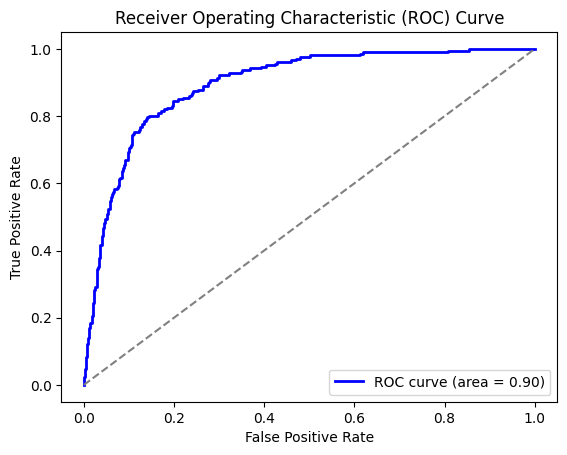

In [84]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train_encoded)

# Estimate scale_pos_weight based on class distribution in y_train
scale_pos_weight = y_train_encoded.tolist().count(0) / y_train_encoded.tolist().count(1)

# Define parameter grid for RandomizedSearchCV including scale_pos_weight
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 1, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'scale_pos_weight': [scale_pos_weight * 0.8, scale_pos_weight, scale_pos_weight * 1.2]  # Adjusted values
}

# Initialize XGBClassifier and RandomizedSearchCV
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='f1',           # Optimize for F1-score
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the SMOTE resampled data
random_search.fit(X_smote, y_smote)

# Get best model and predict on test data
best_xgb_model = random_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
f1 = f1_score(y_test_encoded, y_pred_xgb)
precision = precision_score(y_test_encoded, y_pred_xgb)
recall = recall_score(y_test_encoded, y_pred_xgb)
roc_auc = roc_auc_score(y_test_encoded, y_proba_xgb)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

# Plot ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_proba_xgb)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [ ]:
#ROS


ROS

In [ ]:
y_train.shape, y_test.shape

((2712,), (1809,))

In [42]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize RandomOverSampler
ros = RandomOverSampler()

# Perform Random Oversampling
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [ ]:
y_ros.value_counts()

,count
deposit,
0,2397
1,2397


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.8949695964621338
F1 Score: 0.47513812154696133
Precision: 0.5512820512820513
Recall: 0.4174757281553398
ROC AUC: 0.8882662362439357


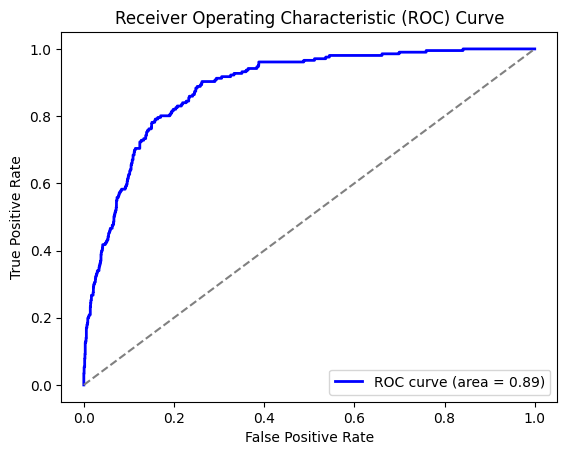

Best parameters found: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': False}


In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Step 1: Apply SMOTE for over-sampling the minority class
smote = SMOTE(random_state=42)

# Step 2: Apply SMOTE to the training data
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Step 3: Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Step 4: Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Step 5: Set up RandomizedSearchCV to search the parameter space
random_search_rf = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_distributions,
    n_iter=10,               # Number of random combinations to try
    scoring='f1',            # Use F1 score for evaluation
    cv=5,                    # 5-fold cross-validation
    random_state=42,         # Ensure reproducibility
    verbose=1,               # Print progress
    n_jobs=-1                # Use all available CPU cores
)

# Step 6: Fit RandomizedSearchCV to the oversampled training data
random_search_rf.fit(X_smote, y_smote)

# Step 7: Get the best model from RandomizedSearchCV
best_rf_model = random_search_rf.best_estimator_

# Step 8: Predict on the test data
y_pre_rf_smote = best_rf_model.predict(X_test)
y_proba_rf_smote = best_rf_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Step 9: Calculate metrics
accuracy_rf_smote = accuracy_score(y_test, y_pre_rf_smote)
f1_rf_smote = f1_score(y_test, y_pre_rf_smote)
precision_rf_smote = precision_score(y_test, y_pre_rf_smote)
recall_rf_smote = recall_score(y_test, y_pre_rf_smote)
roc_auc_rf_smote = roc_auc_score(y_test, y_proba_rf_smote)

# Print metrics
print(f"Accuracy: {accuracy_rf_smote}")
print(f"F1 Score: {f1_rf_smote}")
print(f"Precision: {precision_rf_smote}")
print(f"Recall: {recall_rf_smote}")
print(f"ROC AUC: {roc_auc_rf_smote}")

# Step 10: Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf_smote)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf_smote:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Step 11: Print the best parameters found by RandomizedSearchCV
print("Best parameters found:", random_search_rf.best_params_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Accuracy: 0.8960751796572692
F1 Score: 0.5877192982456141
Precision: 0.536
Recall: 0.6504854368932039
ROC AUC: 0.9053837162117147


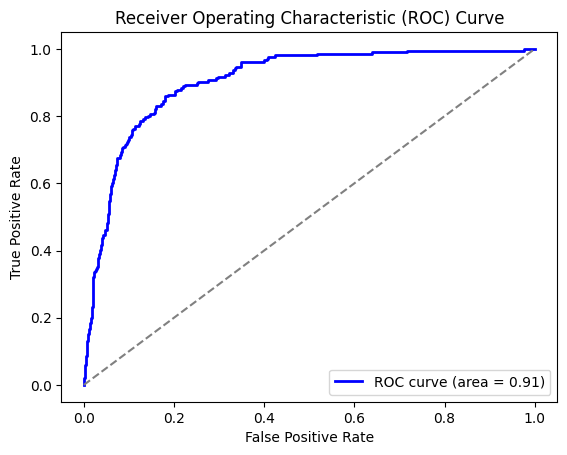

Best parameters found: {'subsample': 0.9, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [79]:
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Step 1: Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Step 2: Perform Random Oversampling
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# Step 3: Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Step 4: Initialize XGBoost without predefined hyperparameters
XGB_Classifier = XGBClassifier()

# Step 5: Set up RandomizedSearchCV to search the parameter space
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,               # Number of random combinations to try
    scoring='f1',            # Use F1 score for evaluation
    cv=10,                    # 5-fold cross-validation
    random_state=42,         # Ensure reproducibility
    verbose=1,               # Print progress
    n_jobs=-1                # Use all available CPU cores
)

# Step 6: Fit RandomizedSearchCV to the oversampled training data
random_search.fit(X_ros, y_ros)

# Step 7: Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Step 8: Predict on the test data
y_pre_xgb_ros = best_model.predict(X_test)
y_proba_xgb_ros = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Step 9: Calculate metrics
accuracy_ros = accuracy_score(y_test, y_pre_xgb_ros)
f1_ros = f1_score(y_test, y_pre_xgb_ros)
precision_ros = precision_score(y_test, y_pre_xgb_ros)
recall_ros = recall_score(y_test, y_pre_xgb_ros)
roc_auc_ros = roc_auc_score(y_test, y_proba_xgb_ros)

# Print metrics
print(f"Accuracy: {accuracy_ros}")
print(f"F1 Score: {f1_ros}")
print(f"Precision: {precision_ros}")
print(f"Recall: {recall_ros}")
print(f"ROC AUC: {roc_auc_ros}")

# Step 10: Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb_ros)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_ros:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Step 11: Print the best parameters found by RandomizedSearchCV
print("Best parameters found:", random_search.best_params_)


RUS

In [77]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize RandomUnderSampler
rus = RandomUnderSampler()

# Perform Random Undersampling
X_rus, y_rus = rus.fit_resample(X_train, y_train)


y_rus.value_counts()

,count
deposit,
0,315
1,315


RUS

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Accuracy: 0.7998894416804865
F1 Score: 0.4887005649717514
Precision: 0.34462151394422313
Recall: 0.8398058252427184
ROC AUC: 0.8810285932323496


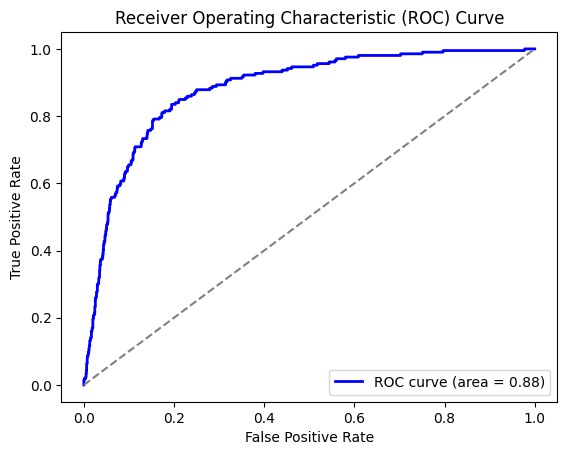

Best parameters found: {'subsample': 0.7, 'min_child_weight': 2, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 5, 'colsample_bytree': 0.8}


In [78]:
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Step 1: Apply Random Under-Sampling (RUS)
rus = RandomUnderSampler(random_state=139)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Step 2: Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Step 3: Initialize XGBoost without predefined hyperparameters
XGB_Classifier = XGBClassifier()

# Step 4: Set up RandomizedSearchCV to search the parameter space
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,               # Number of random combinations to try
    scoring='f1',            # Use F1 score for evaluation
    cv=10,                    # 5-fold cross-validation
    random_state=42,         # Ensure reproducibility
    verbose=1,               # Print progress
    n_jobs=-1                # Use all available CPU cores
)

# Step 5: Fit RandomizedSearchCV to the RUS-resampled training data
random_search.fit(X_train_rus, y_train_rus)

# Step 6: Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Step 7: Predict on the test data
y_pre_xgb_rus = best_model.predict(X_test)
y_proba_xgb_rus = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Step 8: Calculate metrics
accuracy_rus = accuracy_score(y_test, y_pre_xgb_rus)
f1_rus = f1_score(y_test, y_pre_xgb_rus)
precision_rus = precision_score(y_test, y_pre_xgb_rus)
recall_rus = recall_score(y_test, y_pre_xgb_rus)
roc_auc_rus = roc_auc_score(y_test, y_proba_xgb_rus)

# Print metrics
print(f"Accuracy: {accuracy_rus}")
print(f"F1 Score: {f1_rus}")
print(f"Precision: {precision_rus}")
print(f"Recall: {recall_rus}")
print(f"ROC AUC: {roc_auc_rus}")

# Step 9: Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb_rus)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rus:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Step 10: Print the best parameters found by RandomizedSearchCV
print("Best parameters found:", random_search.best_params_)


In [50]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV # Changed to import from sklearn
from cuml.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt

# Resample using SMOTE
counter = Counter(y_train)
print('Before:', counter)
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_sm)
print('After:', counter)

# ... (Rest of the code remains the same)

Before: Counter({0: 2397, 1: 315})
After: Counter({0: 2397, 1: 2397})


Before: Counter({0: 2397, 1: 315})
After: Counter({0: 2397, 1: 2397})
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters found: {'subsample': 0.9, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Accuracy: 0.9021558872305141
F1 Score: 0.5449871465295629
Precision: 0.5792349726775956
Recall: 0.5145631067961165
ROC AUC: 0.8985246110145421


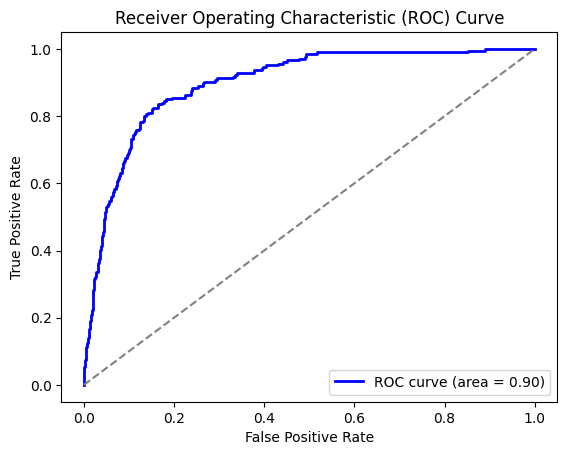

In [74]:
import numpy as np
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
import matplotlib.pyplot as plt

# SMOTE Resampling
counter = Counter(y_train)
print('Before:', counter)
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_sm)
print('After:', counter)

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Initialize XGBoost with GPU support
XGB_Classifier = XGBClassifier(
    tree_method='gpu_hist',   # Use GPU for training
    predictor='gpu_predictor' # Use GPU for predictions
)

# Use RandomizedSearchCV with the chosen parameter distributions to maximize F1 score
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,                # Number of random combinations to try
    scoring='f1',             # Optimize for F1 score
    cv=10,                     # 3-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1                 # Use all available cores
)

# Fit the model on the SMOTE-resampled training data
random_search.fit(X_train_sm, y_train_sm)
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

# Predict on the test data
y_pre_xgb_sm = best_model.predict(X_test)
y_proba_xgb_sm = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy_sm = accuracy_score(y_test, y_pre_xgb_sm)
f1_sm = f1_score(y_test, y_pre_xgb_sm)
precision_sm = precision_score(y_test, y_pre_xgb_sm)
recall_sm = recall_score(y_test, y_pre_xgb_sm)
roc_auc_sm = roc_auc_score(y_test, y_proba_xgb_sm)

print(f"Accuracy: {accuracy_sm}")
print(f"F1 Score: {f1_sm}")
print(f"Precision: {precision_sm}")
print(f"Recall: {recall_sm}")
print(f"ROC AUC: {roc_auc_sm}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb_sm)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_sm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


ADASYN

In [56]:
from imblearn.over_sampling import ADASYN
from collections import Counter
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=42)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 2397, 1: 315})
After Counter({1: 2411, 0: 2397})


Before: Counter({0: 2397, 1: 315})
After: Counter({1: 2411, 0: 2397})
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters found: {'subsample': 0.9, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Accuracy: 0.8938640132669984
F1 Score: 0.5076923076923077
Precision: 0.5380434782608695
Recall: 0.48058252427184467
ROC AUC: 0.8980007146793936


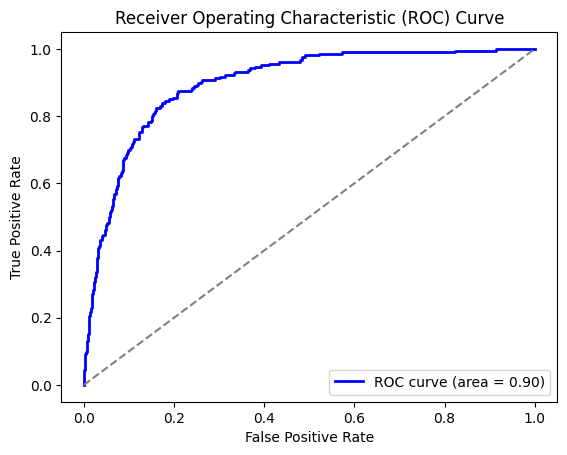

In [73]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from collections import Counter
import matplotlib.pyplot as plt

# Display class distribution before oversampling
counter = Counter(y_train)
print('Before:', counter)

# Apply ADASYN to balance the classes
ada = ADASYN(random_state=42)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

# Display class distribution after ADASYN
counter = Counter(y_train_ada)
print('After:', counter)

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Initialize XGBoost with GPU support
XGB_Classifier = XGBClassifier(
    tree_method='gpu_hist',   # Use GPU for training
    predictor='gpu_predictor' # Use GPU for predictions
)

# Use RandomizedSearchCV with ADASYN-resampled data to find best parameters
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,                 # Number of random combinations to try
    scoring='f1',              # Optimize for F1 score
    cv=10,                      # 3-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1                  # Use all available cores
)

# Fit the model with RandomizedSearchCV on ADASYN-resampled data
random_search.fit(X_train_ada, y_train_ada)
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

# Predict on the test data using the best model
y_pre_xgb_ada = best_model.predict(X_test)
y_proba_xgb_ada = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy_ada = accuracy_score(y_test, y_pre_xgb_ada)
f1_ada = f1_score(y_test, y_pre_xgb_ada)
precision_ada = precision_score(y_test, y_pre_xgb_ada)
recall_ada = recall_score(y_test, y_pre_xgb_ada)
roc_auc_ada = roc_auc_score(y_test, y_proba_xgb_ada)

print(f"Accuracy: {accuracy_ada}")
print(f"F1 Score: {f1_ada}")
print(f"Precision: {precision_ada}")
print(f"Recall: {recall_ada}")
print(f"ROC AUC: {roc_auc_ada}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb_ada)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


SMOTE+ENN

In [ ]:

from imblearn.combine import SMOTEENN
from collections import Counter

# Display class distribution before sampling
counter = Counter(y_train)
print('Before', counter)

# Hybrid of SMOTE-NC and RUS using SMOTEENN
smoteenn = SMOTEENN(random_state=139)
X_train_smenn, y_train_smenn = smoteenn.fit_resample(X_train, y_train)

# Display class distribution after sampling
counter = Counter(y_train_smenn)
print('After', counter)


Before Counter({0: 2397, 1: 315})
After Counter({1: 2358, 0: 1868})


Before: Counter({0: 2397, 1: 315})
After: Counter({1: 2358, 0: 1868})
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters found: {'subsample': 0.9, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Accuracy: 0.8700939745715865
F1 Score: 0.5703839122486288
Precision: 0.4574780058651026
Recall: 0.7572815533980582
ROC AUC: 0.9044388858269387


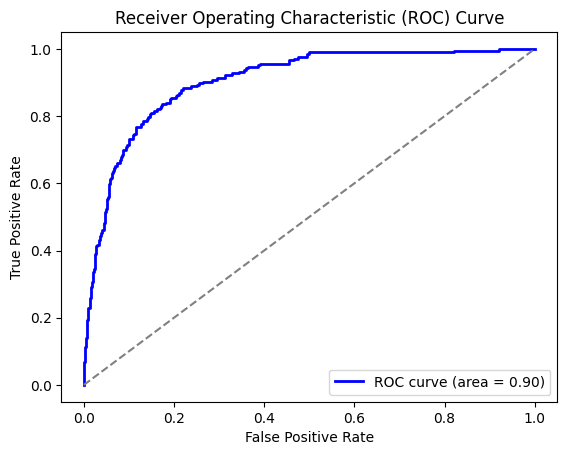

In [72]:
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Display class distribution before sampling
counter = Counter(y_train)
print('Before:', counter)

# Apply SMOTEENN for hybrid resampling
smoteenn = SMOTEENN(random_state=139)
X_train_smenn, y_train_smenn = smoteenn.fit_resample(X_train, y_train)

# Display class distribution after SMOTEENN
counter = Counter(y_train_smenn)
print('After:', counter)

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Initialize XGBoost with GPU support
XGB_Classifier = XGBClassifier(
    tree_method='gpu_hist',    # Use GPU for training
    predictor='gpu_predictor'  # Use GPU for predictions
)

# Set up RandomizedSearchCV to optimize F1 score
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,                 # Number of random combinations to try
    scoring='f1',              # Optimize for F1 score
    cv=10,                      # 3-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1                  # Use all available cores
)

# Fit RandomizedSearchCV with SMOTEENN-resampled data
random_search.fit(X_train_smenn, y_train_smenn)
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

# Predict on the test data using the best model
y_pre_xgb_smenn = best_model.predict(X_test)
y_proba_xgb_smenn = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy_smenn = accuracy_score(y_test, y_pre_xgb_smenn)
f1_smenn = f1_score(y_test, y_pre_xgb_smenn)
precision_smenn = precision_score(y_test, y_pre_xgb_smenn)
recall_smenn = recall_score(y_test, y_pre_xgb_smenn)
roc_auc_smenn = roc_auc_score(y_test, y_proba_xgb_smenn)

print(f"Accuracy: {accuracy_smenn}")
print(f"F1 Score: {f1_smenn}")
print(f"Precision: {precision_smenn}")
print(f"Recall: {recall_smenn}")
print(f"ROC AUC: {roc_auc_smenn}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb_smenn)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_smenn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


SMOTE+TOMEK Links

In [ ]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 2397, 1: 315})
After Counter({0: 2395, 1: 2395})


Before: Counter({0: 2397, 1: 315})
After: Counter({0: 2395, 1: 2395})
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters found: {'subsample': 0.9, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Accuracy: 0.9021558872305141
F1 Score: 0.5518987341772152
Precision: 0.5767195767195767
Recall: 0.529126213592233
ROC AUC: 0.8992090073830015


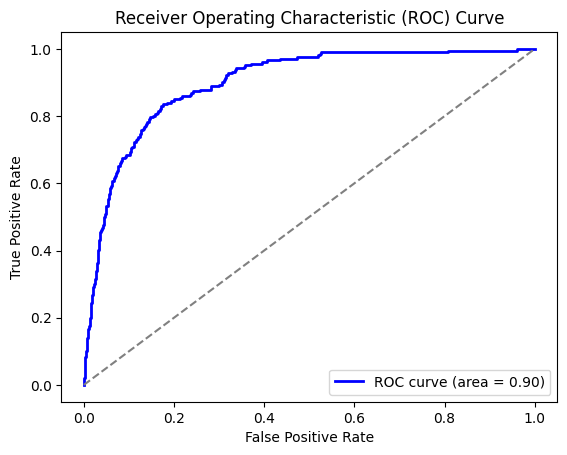

In [66]:
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Display class distribution before SMOTETomek resampling
counter = Counter(y_train)
print('Before:', counter)

# Apply SMOTETomek for hybrid resampling
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

# Display class distribution after SMOTETomek
counter = Counter(y_train_smtom)
print('After:', counter)

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Initialize XGBoost with GPU support
XGB_Classifier = XGBClassifier(
    tree_method='gpu_hist',    # Use GPU for training
    predictor='gpu_predictor'  # Use GPU for predictions
)

# Set up RandomizedSearchCV to optimize F1 score
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,                 # Number of random combinations to try
    scoring='f1',              # Optimize for F1 score
    cv=10,                      # 3-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1                  # Use all available cores
)

# Fit RandomizedSearchCV with SMOTETomek-resampled data
random_search.fit(X_train_smtom, y_train_smtom)
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

# Predict on the test data using the best model
y_pre_xgb_smtom = best_model.predict(X_test)
y_proba_xgb_smtom = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy_smtom = accuracy_score(y_test, y_pre_xgb_smtom)
f1_smtom = f1_score(y_test, y_pre_xgb_smtom)
precision_smtom = precision_score(y_test, y_pre_xgb_smtom)
recall_smtom = recall_score(y_test, y_pre_xgb_smtom)
roc_auc_smtom = roc_auc_score(y_test, y_proba_xgb_smtom)

print(f"Accuracy: {accuracy_smtom}")
print(f"F1 Score: {f1_smtom}")
print(f"Precision: {precision_smtom}")
print(f"Recall: {recall_smtom}")
print(f"ROC AUC: {roc_auc_smtom}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb_smtom)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_smtom:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


SMOTE+NC+RUS

In [ ]:
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Display class distribution before sampling
counter = Counter(y_train)
print('Before', counter)

# Step 1: Apply SMOTE-NC (works on both continuous and categorical features)
smotenc = SMOTENC(categorical_features=[0, 1], random_state=139)  # Example: assume columns 0 and 1 are categorical
X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train, y_train)

# Step 2: Apply Random Under-Sampling (RUS) on the resampled data from SMOTE-NC
rus = RandomUnderSampler(random_state=139)
X_train_smotenc_rus, y_train_smotenc_rus = rus.fit_resample(X_train_smotenc, y_train_smotenc)

# Display class distribution after sampling
counter = Counter(y_train_smotenc_rus)
print('After', counter)


Before Counter({0: 2397, 1: 315})
After Counter({0: 2397, 1: 2397})


Before: Counter({0: 2397, 1: 315})
After: Counter({0: 2397, 1: 2397})
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters found: {'subsample': 0.9, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Accuracy: 0.8988391376451078
F1 Score: 0.5271317829457365
Precision: 0.56353591160221
Recall: 0.49514563106796117
ROC AUC: 0.8994633847942873


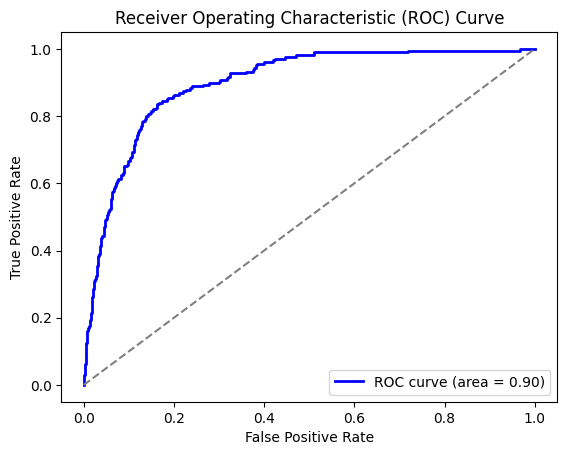

In [67]:
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Display class distribution before sampling
counter = Counter(y_train)
print('Before:', counter)

# Step 1: Apply SMOTENC (assume columns 0 and 1 are categorical)
smotenc = SMOTENC(categorical_features=[0, 1], random_state=139)
X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train, y_train)

# Step 2: Apply Random Under-Sampling on SMOTENC-resampled data
rus = RandomUnderSampler(random_state=139)
X_train_smotenc_rus, y_train_smotenc_rus = rus.fit_resample(X_train_smotenc, y_train_smotenc)

# Display class distribution after SMOTENC + RUS
counter = Counter(y_train_smotenc_rus)
print('After:', counter)

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Initialize XGBoost with GPU support
XGB_Classifier = XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor'
)

# Set up RandomizedSearchCV to optimize F1 score
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,
    scoring='f1',
    cv=10,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit RandomizedSearchCV with SMOTENC + RUS data
random_search.fit(X_train_smotenc_rus, y_train_smotenc_rus)
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

# Predict on the test data using the best model
y_pre_xgb_smotenc_rus = best_model.predict(X_test)
y_proba_xgb_smotenc_rus = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_smotenc_rus = accuracy_score(y_test, y_pre_xgb_smotenc_rus)
f1_smotenc_rus = f1_score(y_test, y_pre_xgb_smotenc_rus)
precision_smotenc_rus = precision_score(y_test, y_pre_xgb_smotenc_rus)
recall_smotenc_rus = recall_score(y_test, y_pre_xgb_smotenc_rus)
roc_auc_smotenc_rus = roc_auc_score(y_test, y_proba_xgb_smotenc_rus)

print(f"Accuracy: {accuracy_smotenc_rus}")
print(f"F1 Score: {f1_smotenc_rus}")
print(f"Precision: {precision_smotenc_rus}")
print(f"Recall: {recall_smotenc_rus}")
print(f"ROC AUC: {roc_auc_smotenc_rus}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb_smotenc_rus)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_smotenc_rus:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


SMOTE+NC

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Accuracy: 0.9010503040353787
F1 Score: 0.484149855907781
Precision: 0.5957446808510638
Recall: 0.4077669902912621
ROC AUC: 0.8944818271566055


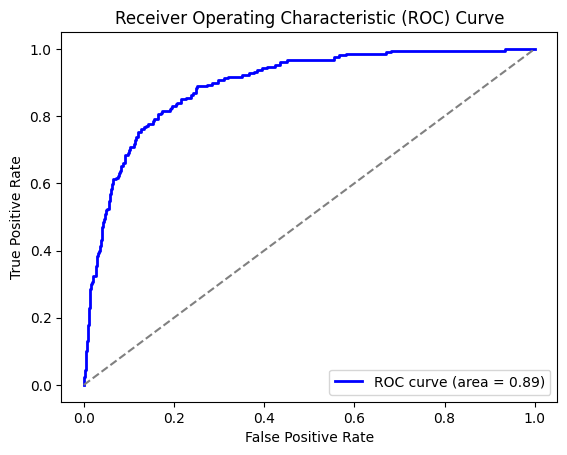

Best parameters found: {'subsample': 0.7, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.9}


In [71]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9]
}

# Initialize XGBoost without predefined hyperparameters
XGB_Classifier = XGBClassifier()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGB_Classifier,
    param_distributions=param_distributions,
    n_iter=10,               # Number of random combinations to try
    scoring='f1',            # Use F1 score for evaluation
    cv=10,                    # 5-fold cross-validation
    random_state=42,         # Ensure reproducibility
    verbose=1,               # Print progress
    n_jobs=-1                # Use all available CPU cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Predict on the test data
y_pre_xgb = best_model.predict(X_test)
y_proba_xgb = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pre_xgb)
f1_xgb = f1_score(y_test, y_pre_xgb)
precision_xgb = precision_score(y_test, y_pre_xgb)
recall_xgb = recall_score(y_test, y_pre_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# Print metrics
print(f"Accuracy: {accuracy_xgb}")
print(f"F1 Score: {f1_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"ROC AUC: {roc_auc_xgb}")

# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the best parameters found by RandomizedSearchCV
print("Best parameters found:", random_search.best_params_)


In [ ]:
# Install the necessary libraries
!pip install imbalanced-learn xgboost ctgan torch



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.0 MB/s eta 0:00:00


In [ ]:
from ctgan import CTGAN

ctgan = CTGAN(epochs=300)  # Adjust epochs as needed
ctgan.fit(X_train)

# Generate synthetic samples equal to the minority class size
X_synthetic = ctgan.sample(len(y_train[y_train == 1]))  # Adjust to match the minority class size
y_synthetic = pd.Series([1] * len(X_synthetic))  # Label as minority class
import pandas as pd

# Convert X_train and X_synthetic to DataFrames before concatenation
X_train_df = pd.DataFrame(X_train)
X_synthetic_df = pd.DataFrame(X_synthetic)

# Combine synthetic samples with original data
X_ctgan = pd.concat([X_train_df, X_synthetic_df])
y_ctgan = pd.concat([y_train, y_synthetic])



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def train_xgboost(X_train, y_train, X_test, y_test):
    model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=4, scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred)
    }

# Example training with ROS data

results_ctgan = train_xgboost(X_ctgan, y_ctgan, X_test, y_test)


print("CTGAN Results:", results_ctgan)


CTGAN Results: {'Accuracy': 0.8817025981205086, 'F1 Score': 0.5407725321888412, 'ROC AUC': 0.7640286114021646}


In [ ]:
!pip install torch


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Parameters
latent_dim = 100  # Latent space dimension
class_dim = 1  # Dimension for class label (binary here)

# Define the Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + class_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, z, labels):
        # Concatenate noise and label
        gen_input = torch.cat((z, labels), -1)
        return self.model(gen_input)

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + class_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x, labels):
        # Concatenate input and label
        disc_input = torch.cat((x, labels), -1)
        return self.model(disc_input)

# Initialize Generator and Discriminator
gen = Generator(latent_dim, X_train.shape[1])
disc = Discriminator(X_train.shape[1])
device = 'cuda' if torch.cuda.is_available() else 'cpu'
gen, disc = gen.to(device), disc.to(device)


In [ ]:
# Loss and Optimizers
adversarial_loss = nn.BCELoss()
optimizer_G = optim.Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(disc.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Convert the dataset to tensors for PyTorch
# X_train is already a NumPy array, so directly convert it to a tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)

# DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# ... (rest of the code remains the same)
# Training
n_epochs = 100  # Adjust epochs as needed
for epoch in range(n_epochs):
    for i, (real_samples, labels) in enumerate(train_loader):
        batch_size = real_samples.size(0)

        # Adversarial ground truths
        valid = torch.ones((batch_size, 1), requires_grad=False).to(device)
        fake = torch.zeros((batch_size, 1), requires_grad=False).to(device)

        # ---------------------
        #  Train Generator
        # ---------------------
        optimizer_G.zero_grad()

        # Generate noise and class labels
        z = torch.randn(batch_size, latent_dim).to(device)
        gen_labels = labels

        # Generate a batch of synthetic samples
        gen_samples = gen(z, gen_labels)
        validity = disc(gen_samples, gen_labels)
        g_loss = adversarial_loss(validity, valid)

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()

        # Real samples loss
        real_validity = disc(real_samples, labels)
        d_real_loss = adversarial_loss(real_validity, valid)

        # Fake samples loss
        fake_validity = disc(gen_samples.detach(), gen_labels)
        d_fake_loss = adversarial_loss(fake_validity, fake)

        # Total discriminator loss
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

    # Print progress

        print(f"Epoch [{epoch}/{n_epochs}] | D Loss: {d_loss.item()} | G Loss: {g_loss.item()}")

print("CGAN training finished!")


Epoch [0/100] | D Loss: 0.6942331194877625 | G Loss: 0.6785876750946045
Epoch [0/100] | D Loss: 0.6786420345306396 | G Loss: 0.6906020045280457
Epoch [0/100] | D Loss: 0.672163724899292 | G Loss: 0.7038456797599792
Epoch [0/100] | D Loss: 0.6579234600067139 | G Loss: 0.7168535590171814
Epoch [0/100] | D Loss: 0.6488937139511108 | G Loss: 0.7309960722923279
Epoch [0/100] | D Loss: 0.639024555683136 | G Loss: 0.7443215250968933
Epoch [0/100] | D Loss: 0.6285711526870728 | G Loss: 0.7570732235908508
Epoch [0/100] | D Loss: 0.6210324168205261 | G Loss: 0.7695122957229614
Epoch [0/100] | D Loss: 0.6109835505485535 | G Loss: 0.7820798754692078
Epoch [0/100] | D Loss: 0.6014950275421143 | G Loss: 0.7921947836875916
Epoch [0/100] | D Loss: 0.5970674753189087 | G Loss: 0.7999200820922852
Epoch [0/100] | D Loss: 0.5858069658279419 | G Loss: 0.8113662004470825
Epoch [0/100] | D Loss: 0.5724858045578003 | G Loss: 0.820855975151062
Epoch [0/100] | D Loss: 0.5706121921539307 | G Loss: 0.830382168292

In [ ]:
# Number of synthetic samples to generate
n_synthetic_samples = len(y_train[y_train == 1])  # Match the minority class count

# Generate synthetic samples
z = torch.randn(n_synthetic_samples, latent_dim).to(device)
labels = torch.ones((n_synthetic_samples, 1)).to(device)  # Condition on minority class (label = 1)
synthetic_samples = gen(z, labels).detach().cpu().numpy()

# Combine synthetic samples with original data
X_augmented = np.vstack((X_train, synthetic_samples))
y_augmented = np.hstack((y_train, np.ones(n_synthetic_samples)))

print("Synthetic minority samples generated and added to the dataset!")


Synthetic minority samples generated and added to the dataset!


In [ ]:
import xgboost as xgb
from sklearn.metrics import f1_score

model = xgb.XGBClassifier(objective='binary:logistic')
model.fit(X_augmented, y_augmented)

# Evaluate on test data
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1 Score on original test set:", f1)


F1 Score on original test set: 0.5081967213114754


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import pandas as pd

class WGAN_GP:
    def __init__(self, data_dim, latent_dim=64, n_critic=5):
        self.latent_dim = latent_dim
        self.data_dim = data_dim
        self.n_critic = n_critic
        self.generator = self.build_generator()
        self.critic = self.build_critic()
        self.gen_optimizer = tf.keras.optimizers.Adam(1e-4)
        self.critic_optimizer = tf.keras.optimizers.Adam(1e-4)

    def build_generator(self):
        model = tf.keras.Sequential([
            layers.Dense(128, activation='relu', input_dim=self.latent_dim),
            layers.Dense(256, activation='relu'),
            layers.Dense(self.data_dim, activation='tanh')
        ])
        return model

    def build_critic(self):
        model = tf.keras.Sequential([
            layers.Dense(256, activation='leaky_relu', input_dim=self.data_dim),
            layers.Dense(128, activation='leaky_relu'),
            layers.Dense(1)
        ])
        return model

    def gradient_penalty(self, real_data, fake_data):
        alpha = tf.random.uniform([real_data.shape[0], 1], 0.0, 1.0)
        interpolated = alpha * real_data + (1 - alpha) * fake_data
        with tf.GradientTape() as tape:
            tape.watch(interpolated)
            pred = self.critic(interpolated)
        grad = tape.gradient(pred, [interpolated])[0]
        norm = tf.sqrt(tf.reduce_sum(tf.square(grad), axis=1))
        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

    def train(self, real_data, epochs=1000, batch_size=64):
        for epoch in range(epochs):
            for _ in range(self.n_critic):
                # Critic training
                idx = np.random.randint(0, real_data.shape[0], batch_size)
                real_samples = real_data[idx]
                with tf.GradientTape() as tape:
                    noise = tf.random.normal([batch_size, self.latent_dim])
                    fake_samples = self.generator(noise)
                    real_pred = self.critic(real_samples)
                    fake_pred = self.critic(fake_samples)
                    gp = self.gradient_penalty(real_samples, fake_samples)
                    critic_loss = tf.reduce_mean(fake_pred) - tf.reduce_mean(real_pred) + 10.0 * gp
                grads = tape.gradient(critic_loss, self.critic.trainable_variables)
                self.critic_optimizer.apply_gradients(zip(grads, self.critic.trainable_variables))

            # Generator training
            with tf.GradientTape() as tape:
                noise = tf.random.normal([batch_size, self.latent_dim])
                fake_samples = self.generator(noise)
                fake_pred = self.critic(fake_samples)
                gen_loss = -tf.reduce_mean(fake_pred)
            grads = tape.gradient(gen_loss, self.generator.trainable_variables)
            self.gen_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))



# Train WGAN-GP
# Train WGAN-GP
# Convert X_train to a DataFrame before concatenation
X_train_df = pd.DataFrame(X_train)
real_data = np.array(pd.concat([X_train_df, y_train], axis=1))  # Now concatenate DataFrames

wgan_gp = WGAN_GP(data_dim=real_data.shape[1])
wgan_gp.train(real_data, epochs=200) # Adjust epochs as needed


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
def generate_synthetic_data(wgan_gp, num_samples):
    noise = tf.random.normal([num_samples, wgan_gp.latent_dim])
    synthetic_data = wgan_gp.generator(noise)
    return synthetic_data.numpy()

# Assuming y_train contains labels 0 and 1 for a binary classification problem
num_synthetic_samples = X_train.shape[0]  # Generate as many synthetic samples as in the training set
synthetic_data = generate_synthetic_data(wgan_gp, num_synthetic_samples)

# Assign synthetic labels (e.g., the same distribution as real data labels)
synthetic_labels = np.random.choice(y_train, size=num_synthetic_samples)

# Combine real and synthetic data
X_combined = np.vstack([X_train, synthetic_data])
y_combined = np.hstack([y_train, synthetic_labels])

# Step 2: Split the combined dataset
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.4, random_state=42
)

# Step 3: Train a classifier on the combined data
classifier = RandomForestClassifier()
classifier.fit(X_train_combined, y_train_combined)

# Step 4: Evaluate performance on the test set
y_pred = classifier.predict(X_test_combined)
y_proba = classifier.predict_proba(X_test_combined)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test_combined, y_pred)
f1 = f1_score(y_test_combined, y_pred)
roc_auc = roc_auc_score(y_test_combined, y_proba)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# Plot ROC AUC curve
fpr, tpr, _ = roc_curve(y_test_combined, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.legend(loc="lower right")
plt.show()


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 42 and the array at index 1 has size 43

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
def generate_synthetic_data(wgan_gp, num_samples):
    noise = tf.random.normal([num_samples, wgan_gp.latent_dim])
    synthetic_data = wgan_gp.generator(noise)
    return synthetic_data.numpy()

# Assuming y_train contains labels 0 and 1 for a binary classification problem
num_synthetic_samples = X_train.shape[0]  # Generate as many synthetic samples as in the training set
synthetic_data = generate_synthetic_data(wgan_gp, num_synthetic_samples)

# Adjust the shape of synthetic_data to match X_train
synthetic_data = synthetic_data[:, :-1]  # Remove the last column

# Assign synthetic labels (e.g., the same distribution as real data labels)
synthetic_labels = np.random.choice(y_train, size=num_synthetic_samples)

# Combine real and synthetic data
X_combined = np.vstack([X_train, synthetic_data])
y_combined = np.hstack([y_train, synthetic_labels])

# Step 2: Split the combined dataset
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42
)

# Step 3: Train a classifier on the combined data
classifier = RandomForestClassifier()
classifier.fit(X_train_combined, y_train_combined)

# Step 4: Evaluate performance on the test set
y_pred = classifier.predict(X_test_combined)
y_proba = classifier.predict_proba(X_test_combined)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test_combined, y_pred)
f1 = f1_score(y_test_combined, y_pred)
roc_auc = roc_auc_score(y_test_combined, y_proba)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# Plot ROC AUC curve
fpr, tpr, _ = roc_curve(y_test_combined, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.legend(loc="lower right")
plt.show()